In [2]:
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Conv2D, AveragePooling2D, Input, Dense, BatchNormalization, Dropout
from keras.models import load_model, Model, Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
import pickle
import pandas as pd
import numpy as np
from numpy.random import seed; seed(111)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import random; random.set_seed(111)
from sklearn.metrics import roc_curve, auc
from six import StringIO 
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import ttest_ind
from scikeras.wrappers import KerasClassifier
from IPython.display import Image  
import pydotplus
import os
import fcsparser as fcsp

In [3]:
# Loading Data
global path

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            print(file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data
 
# Loading fcs file data into a dictionary
global path 
dir = os.path.abspath(os.path.dirname('./CHD1_1.fcs'))
dir = os.path.join(dir, 'FCM Data for Kartik')
data = load_data(dir)



---- loading data ---->
CHD1_1.fcs
CHD1_2.fcs
CHD1_3.fcs
CHD2_1.fcs
CHD2_2.fcs
CHD2_3.fcs
CHD3_1.fcs
CHD3_2.fcs
CHD3_3.fcs
CHD4_1.fcs
CHD4_2.fcs
CHD4_3.fcs
CHD5_1.fcs
CHD5_2.fcs
CHD5_3.fcs
CLD1_1.fcs
CLD1_2.fcs
CLD1_3.fcs
CLD2_1.fcs
CLD2_2.fcs
CLD2_3.fcs
CLD3_1.fcs
CLD3_2.fcs
CLD3_3.fcs
CLD4_1.fcs
CLD4_2.fcs
CLD4_3.fcs
CLD5_1.fcs
CLD5_2.fcs
CLD5_3.fcs
CMD1_1.fcs
CMD1_2.fcs
CMD1_3.fcs
CMD2_1.fcs
CMD2_2.fcs
CMD2_3.fcs
CMD3_1.fcs
CMD3_2.fcs
CMD3_3.fcs
CMD4_1.fcs
CMD4_2.fcs
CMD4_3.fcs
CMD5_1.fcs
CMD5_2.fcs
CMD5_3.fcs
IND0_1.fcs
IND0_2.fcs
IND0_3.fcs
NCD1_1.fcs
NCD1_2.fcs
NCD1_3.fcs
NCD2_1.fcs
NCD2_2.fcs
NCD2_3.fcs
NCD3_1.fcs
NCD3_2.fcs
NCD3_3.fcs
NCD4_1.fcs
NCD4_2.fcs
NCD4_3.fcs
NCD5_1.fcs
NCD5_2.fcs
NCD5_3.fcs
PCD1_1.fcs
PCD1_2.fcs
PCD1_3.fcs
PCD2_1.fcs
PCD2_2.fcs
PCD2_3.fcs
PCD3_1.fcs
PCD3_2.fcs
PCD3_3.fcs
PCD4_1.fcs
PCD4_2.fcs
PCD4_3.fcs
PCD5_1.fcs
PCD5_2.fcs
PCD5_3.fcs
SHD1_1.fcs
SHD1_2.fcs
SHD1_3.fcs
SHD2_1.fcs
SHD2_2.fcs
SHD2_3.fcs
SHD3_1.fcs
SHD3_2.fcs
SHD3_3.fcs
SHD4_1.fcs
SHD4_2.f

In [4]:
data

{'CHD1_1':              FSC-A   FSC-H        SSC-A     FITC-A        PE-A   PE-Cy5-A  \
 0        96.800003   995.0  1552.320068   2.970000   63.360001  70.290001   
 1       252.800003   707.0  1641.420044  87.120003   38.610001  59.400002   
 2       248.000000   791.0  1152.359985 -89.099998 -523.710022   1.980000   
 3       229.600006   827.0   708.840027  58.410000    1.980000  39.599998   
 4       289.600006   800.0  1036.530029  26.730000 -621.720032  53.459999   
 ...            ...     ...          ...        ...         ...        ...   
 99995  1481.599976  1046.0   420.750000 -14.850000  319.769989  35.639999   
 99996   860.000000   891.0   544.500000 -46.529999 -237.600006 -22.770000   
 99997  2175.199951  1157.0  1025.640015 -58.410000  303.929993  14.850000   
 99998  1770.400024  1002.0   590.039978 -52.470001  258.390015  16.830000   
 99999  1089.599976  1051.0   530.640015 -51.480000 -340.559998  28.710001   
 
          PE-Cy7-A        APC-A   APC-Cy7-A  Pacific

In [5]:
final_df = pd.DataFrame()
for key in data.keys():
    if key not in final_df.keys():
        f_name = key[:]

In [6]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
  deta = {}
  for key in data.keys():
      deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
  return deta

trip_data = triplicates_combined()

In [7]:
data

{'CHD1_1':              FSC-A   FSC-H        SSC-A     FITC-A        PE-A   PE-Cy5-A  \
 0        96.800003   995.0  1552.320068   2.970000   63.360001  70.290001   
 1       252.800003   707.0  1641.420044  87.120003   38.610001  59.400002   
 2       248.000000   791.0  1152.359985 -89.099998 -523.710022   1.980000   
 3       229.600006   827.0   708.840027  58.410000    1.980000  39.599998   
 4       289.600006   800.0  1036.530029  26.730000 -621.720032  53.459999   
 ...            ...     ...          ...        ...         ...        ...   
 99995  1481.599976  1046.0   420.750000 -14.850000  319.769989  35.639999   
 99996   860.000000   891.0   544.500000 -46.529999 -237.600006 -22.770000   
 99997  2175.199951  1157.0  1025.640015 -58.410000  303.929993  14.850000   
 99998  1770.400024  1002.0   590.039978 -52.470001  258.390015  16.830000   
 99999  1089.599976  1051.0   530.640015 -51.480000 -340.559998  28.710001   
 
          PE-Cy7-A        APC-A   APC-Cy7-A  Pacific

In [7]:
#concatenating the dataframes of all triplicates -->
def allData_train_test(sample = 'CH', data = data):

    deta = {}
    # Combining triplicates data and storing d1 to d5 data in 'data' dictionary
    for i in range(1,6):
        samp = sample + 'D' + str(i)
        sample_data = pd.concat([data[samp[:4]+'_1'],data[samp[:4]+'_2'],data[samp[:4]+'_3']],axis=0)
        deta[samp] = sample_data
    vector_data = {}    
    temp = pd.DataFrame()
    for samp in deta.keys():
        sample_vectors = pd.DataFrame()
        peek = deta[samp][['FSC-A', 'SSC-A', 'AmCyan-A']]
        for _ in range(300):
            vector = peek.sample(n = 1000).to_numpy().flatten()
            sample_vectors = np.append(sample_vectors, [vector])
        temp = pd.DataFrame(np.reshape(sample_vectors, (300,3000)))
        temp['label'] = samp
        vector_data[samp] = temp
        
    final_df = pd.DataFrame() 
    print(final_df)
    for key in vector_data.keys():
        final_df = pd.concat([final_df,vector_data[key]], axis = 0, ignore_index=True)
    
    return final_df

    

df = allData_train_test(sample = 'CL' ,data = data)
#df['new_col'] = range(1, len(df) + 1)
#df = df.reset_index()


Empty DataFrame
Columns: []
Index: []


In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,label
0,691.200012,805.859985,246.340012,159.199997,520.739990,98.100006,914.400024,836.549988,312.830017,157.600006,...,167.199997,523.710022,129.710007,1173.599976,1148.400024,292.119995,201.600006,397.980011,-28.340000,CLD1
1,332.000000,508.860016,224.540009,3762.400146,15851.879883,490.500000,1112.000000,373.230011,61.040001,1035.200073,...,224.000000,516.780029,-20.710001,180.000000,458.369995,-77.389999,1796.800049,793.979980,19.620001,CLD1
2,150.400009,544.500000,135.160004,149.600006,389.070007,233.260010,92.800003,670.229980,44.690002,640.799988,...,563.200012,876.150024,71.940002,501.600006,601.919983,-93.740005,218.400009,523.710022,293.210022,CLD1
3,580.000000,1210.770020,213.639999,509.600006,1204.829956,682.340027,406.399994,1033.560059,87.200005,369.600006,...,8656.000000,10852.379883,633.290039,720.000000,396.000000,35.970001,204.800003,330.660004,17.440001,CLD1
4,133.600006,713.789978,103.550003,353.600006,439.559998,44.690002,233.600006,358.380005,-15.260000,62.400002,...,354.399994,859.320007,45.780003,896.799988,1987.920044,200.560013,438.399994,479.160004,9.810000,CLD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,224.800003,2243.340088,197.290009,547.200012,5340.060059,721.580017,492.800018,630.630005,118.810005,1252.800049,...,294.399994,312.839996,67.580002,430.399994,594.000000,161.320007,325.600006,1438.469971,171.130005,CLD5
1496,819.200012,1889.910034,78.480003,258.399994,7726.950195,2614.910156,540.000000,654.390015,64.310005,446.399994,...,592.799988,1368.180054,69.760002,708.799988,488.070007,-40.330002,374.399994,516.780029,-64.310005,CLD5
1497,108.000000,887.040039,126.440002,113.599998,396.989990,164.590012,713.600037,564.299988,185.300003,111.200005,...,767.200012,1730.520020,192.930008,1166.400024,622.710022,76.300003,424.000000,1503.810059,260.510010,CLD5
1498,187.199997,788.039978,81.750000,337.600006,359.369995,50.140003,235.199997,939.510010,135.160004,77.599998,...,653.600037,485.100006,142.790009,616.799988,857.340027,384.770020,1284.000000,6901.290039,1754.900024,CLD5


In [9]:
y = df['label']
x = df.iloc[:,:-1]

def prepData(d, scaler = None):
    if scaler is not None:
        return scaler.fit_transform(d)
    return normalize(StandardScaler().fit_transform(d))

def label(d):
    l = LabelEncoder()
    det = l.fit_transform(d)
    return det, l.classes_

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75)


In [11]:
y_train

1139    CLD4
1147    CLD4
375     CLD2
926     CLD4
1339    CLD5
        ... 
1185    CLD4
1415    CLD5
1446    CLD5
1405    CLD5
505     CLD2
Name: label, Length: 1125, dtype: object

In [12]:
# Preprocessing the data
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = prepData(x_train)
x_test = prepData(x_test)
y_train, y_train_labels = label(y_train)
y_test, y_test_labels = label(y_test)

# Printing train and test data ->
print('X train :', x_train, 'shape :', x_train.shape)
print('X test :', x_test ,'shape :', x_test.shape)
print('Y train:', y_train, 'shape :', y_train.shape)
print('Y test:', y_test, 'shape :', y_test.shape)

X train : [[-1.99096644e-03 -2.20180655e-03 -2.84033764e-03 ... -3.78949483e-03
  -2.77612521e-03 -4.54637600e-03]
 [-1.10013802e-03 -1.71923892e-03 -2.97115928e-03 ...  1.05369273e-03
   3.32753945e-03  1.70160343e-02]
 [ 3.41017855e-02  7.75280971e-02 -2.37404035e-03 ... -1.13677585e-02
  -6.36681594e-03 -7.78267769e-03]
 ...
 [-1.20407313e-02 -9.71239343e-03 -1.57583791e-02 ... -1.47842003e-02
  -1.20461699e-02 -1.53683934e-02]
 [-3.32014631e-03 -9.94955781e-03 -1.17622140e-02 ... -1.57338216e-02
  -8.04120700e-03 -1.44825277e-02]
 [-3.36144482e-03 -2.97609734e-04 -4.85686790e-03 ...  3.49247531e-05
  -5.98009918e-03 -5.74474226e-03]] shape : (1125, 3000)
X test : [[ 0.00231055 -0.00228832 -0.00522483 ... -0.00342413 -0.00368599
  -0.00630677]
 [-0.00102689 -0.00153442  0.02318243 ... -0.00138049 -0.00493094
  -0.00704558]
 [-0.00546611  0.00861653 -0.00501811 ...  0.00065117  0.00193588
   0.01374775]
 ...
 [-0.00281279  0.00408413  0.01431684 ... -0.00326902 -0.00203119
  -0.00436

In [13]:
x_train

array([[-1.99096644e-03, -2.20180655e-03, -2.84033764e-03, ...,
        -3.78949483e-03, -2.77612521e-03, -4.54637600e-03],
       [-1.10013802e-03, -1.71923892e-03, -2.97115928e-03, ...,
         1.05369273e-03,  3.32753945e-03,  1.70160343e-02],
       [ 3.41017855e-02,  7.75280971e-02, -2.37404035e-03, ...,
        -1.13677585e-02, -6.36681594e-03, -7.78267769e-03],
       ...,
       [-1.20407313e-02, -9.71239343e-03, -1.57583791e-02, ...,
        -1.47842003e-02, -1.20461699e-02, -1.53683934e-02],
       [-3.32014631e-03, -9.94955781e-03, -1.17622140e-02, ...,
        -1.57338216e-02, -8.04120700e-03, -1.44825277e-02],
       [-3.36144482e-03, -2.97609734e-04, -4.85686790e-03, ...,
         3.49247531e-05, -5.98009918e-03, -5.74474226e-03]])

In [14]:
def create_mlp(num_features=3000,learning_rate= 0.01, n_estimators = 100,num_classes=20, encoding_dims=[2000],regs=[0.00001],init='uniform',optimizer='adam', max_depth = 0.9, subsample = 0.9):
    model = Sequential()
    model.add(Dense(encoding_dims[0], input_shape=(num_features,),activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(regs[0]))

    for dim, reg in zip(encoding_dims[1:],regs[1:]):
        model.add(Dense(dim, kernel_initializer = init, activation = 'relu'))
        model.add(BatchNormalization())
        model.add(Dropout(reg))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    print (model.summary())
    return model


#Multi layer perceptron
def mlp(x,y,parameters):
    features=x.shape[1]
    classes=len(set(y))
    models=[]
    test_accs=[]
    test_f1s=[]
    for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
        stopper = EarlyStopping(monitor='val_loss', min_delta = 0.01, patience=3, verbose=1)
        
        model = KerasClassifier(learning_rate = 0.01, build_fn=create_mlp, n_estimators=100, max_depth=4, num_features=features, subsample = 0.9, num_classes=classes, verbose=2)
         
        grid = GridSearchCV(model, param_grid=parameters, verbose=100,n_jobs=4, scoring=['f1_weighted','accuracy'],refit='f1_weighted')
        
        stopper = EarlyStopping(monitor='val_loss', min_delta = 0.01, patience=3, verbose=1)
        
        grid.fit(x.iloc[tr_index,:], y[tr_index])
        
        # Finding the best model
        best_model = grid.best_estimator_
        best_model_preds = best_model.predict(x.iloc[ts_index,:])
        test_acc = accuracy_score(y[ts_index],best_model_preds)
        test_f1 = f1_score(y[ts_index], best_model_preds, average="weighted")
        models.append(best_model)
        test_accs.append(test_acc)
        test_f1s.append(test_f1)
    best_test_acc = max(test_accs)
    best_test_model = models[test_accs.index(best_test_acc)]
    print ('\n\n Nested CV Results: {0} {1} {2} {3}\n\n'.format(np.mean(test_accs), np.std(test_accs), np.mean(test_f1s), np.std(test_f1s)))
    return best_test_model
    


In [15]:
# parameters = {    'subsample'    : [0.9, 0.5, 0.2],
#                 'n_estimators' : [100,500,1000],}
mlp(x, y, parameters)

NameError: name 'parameters' is not defined

In [8]:
# Data conversion to image model
import numpy as np
def allData_train_test(sample = 'CH', data = data):

    deta = {}
    # Combining triplicates data and storing d1 to d5 data in 'data' dictionary
    for i in range(1,6):
        samp = sample + 'D' + str(i)
        sample_data = pd.concat([data[samp[:4]+'_1'],data[samp[:4]+'_2'],data[samp[:4]+'_3']],axis=0)
        deta[samp] = sample_data
    vector_data = np.array([])
    temp = np.zeros((1500,1000,3), dtype=np.float32)
    ind = 0
    for samp in deta.keys():
        print(samp)
        sample_vectors = np.array([[]])
        peek = deta[samp][['FSC-A', 'SSC-A', 'AmCyan-A']]

        for _ in range(300):
            vector = peek.sample(n = 1000).to_numpy()
            temp[ind] = vector
            ind+=1
            vector_data = np.append(vector_data,samp)
    
    print(temp[0].shape)
        #temp = pd.DataFrame(np.reshape(sample_vectors, (300,3000)))
        #temp['label'] = samp
        #vector_data[samp] = temp
        
    #final_df = pd.DataFrame() 
    #print(final_df)
    #for key in vector_data.keys():
    #    final_df = pd.concat([final_df,vector_data[key]], axis = 0, ignore_index=True)
    
    return temp, vector_data

paka, y = allData_train_test()

CHD1
CHD2
CHD3
CHD4
CHD5
(1000, 3)


In [12]:
df_train,df_test,y_train,y_test =  train_test_split(paka,y, train_size = 0.75, random_state = 12)
x_train = df_train

In [57]:
df = df_train.reshape(1,df_train.shape[0], df_train.shape[1], df_train.shape[2])

In [58]:
x_train,x_valid,y_train,y_valid =  train_test_split(x_train,y_train,train_size = 0.75, random_state = 12)


In [59]:
df.shape

(1, 1125, 1000, 3)

In [60]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)
print("Shape of x_valid: ",x_valid.shape)
print("Shape of y_valid: ",y_valid.shape)

Shape of x_train:  (843, 1000, 3)
Shape of x_test:  (375, 3000)
Shape of y_train:  (843,)
Shape of y_test:  (375,)
Shape of x_valid:  (282, 1000, 3)
Shape of y_valid:  (282,)


In [61]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_valid = le.transform(y_valid)
labels = le.classes_

In [63]:
y_train

array([2, 4, 3, 2, 3, 3, 0, 0, 1, 0, 2, 3, 1, 0, 2, 0, 1, 0, 0, 3, 3, 4,
       0, 1, 3, 0, 4, 3, 2, 3, 2, 2, 2, 3, 1, 0, 3, 0, 4, 1, 0, 4, 2, 4,
       1, 3, 1, 4, 3, 4, 3, 0, 2, 0, 4, 2, 3, 3, 4, 2, 2, 0, 1, 3, 0, 0,
       0, 0, 1, 4, 3, 1, 2, 2, 4, 3, 0, 4, 4, 0, 4, 4, 1, 2, 4, 0, 2, 4,
       2, 1, 1, 4, 3, 1, 2, 3, 2, 4, 2, 2, 4, 3, 2, 1, 3, 1, 0, 2, 4, 3,
       4, 4, 4, 0, 4, 1, 3, 4, 0, 2, 0, 2, 4, 4, 1, 0, 1, 2, 1, 4, 2, 3,
       1, 0, 3, 2, 3, 0, 2, 2, 0, 3, 0, 2, 0, 3, 0, 2, 2, 0, 0, 4, 0, 2,
       1, 2, 4, 0, 0, 2, 2, 3, 1, 4, 1, 2, 0, 0, 2, 4, 4, 3, 1, 4, 4, 0,
       2, 4, 1, 4, 1, 1, 1, 0, 0, 1, 0, 2, 4, 4, 0, 0, 0, 2, 0, 3, 0, 2,
       4, 2, 1, 0, 0, 2, 3, 1, 4, 4, 1, 4, 1, 0, 1, 1, 1, 4, 2, 0, 1, 2,
       2, 1, 1, 4, 3, 1, 2, 2, 4, 2, 3, 1, 3, 2, 4, 3, 1, 2, 0, 1, 2, 4,
       1, 3, 4, 4, 3, 4, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 0, 1, 3, 0, 2, 2,
       0, 0, 4, 4, 0, 1, 3, 0, 4, 2, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 1, 0,
       4, 0, 1, 0, 2, 2, 4, 4, 1, 3, 2, 4, 4, 4, 3,

In [64]:
# Defining the DNN model 



# input
model_input = Input(shape=x_train[0].shape)

# first convolution layer
model_output = Conv2D(3, kernel_size=(1, x_train.shape[2]),
                 activation=None)(model_input)
model_output = BatchNormalization()(model_output)
model_output = Activation("relu")(model_output)

# sceond convolution layer
model_output = Conv2D(3, (1, 1), activation=None)(model_output)
model_output = BatchNormalization()(model_output)
model_output = Activation("relu")(model_output)

# pooling layer
model_output = AveragePooling2D(pool_size=(x_train.shape[1], 1))(model_output)
model_output = Flatten()(model_output)

# Dense layer
model_output = Dense(3, activation=None)(model_output)
model_output = BatchNormalization()(model_output)
model_output = Activation("relu")(model_output)

# output layer
model_output = Dense(1, activation=None)(model_output)
model_output = BatchNormalization()(model_output)
model_output = Activation("sigmoid")(model_output)

In [65]:
print(x_train.shape, y_train.shape)
print(y_train)


(843, 1000, 3, 1) (843,)
[2 4 3 2 3 3 0 0 1 0 2 3 1 0 2 0 1 0 0 3 3 4 0 1 3 0 4 3 2 3 2 2 2 3 1 0 3
 0 4 1 0 4 2 4 1 3 1 4 3 4 3 0 2 0 4 2 3 3 4 2 2 0 1 3 0 0 0 0 1 4 3 1 2 2
 4 3 0 4 4 0 4 4 1 2 4 0 2 4 2 1 1 4 3 1 2 3 2 4 2 2 4 3 2 1 3 1 0 2 4 3 4
 4 4 0 4 1 3 4 0 2 0 2 4 4 1 0 1 2 1 4 2 3 1 0 3 2 3 0 2 2 0 3 0 2 0 3 0 2
 2 0 0 4 0 2 1 2 4 0 0 2 2 3 1 4 1 2 0 0 2 4 4 3 1 4 4 0 2 4 1 4 1 1 1 0 0
 1 0 2 4 4 0 0 0 2 0 3 0 2 4 2 1 0 0 2 3 1 4 4 1 4 1 0 1 1 1 4 2 0 1 2 2 1
 1 4 3 1 2 2 4 2 3 1 3 2 4 3 1 2 0 1 2 4 1 3 4 4 3 4 2 2 3 2 2 2 0 2 2 2 0
 1 3 0 2 2 0 0 4 4 0 1 3 0 4 2 3 3 3 3 1 0 3 3 3 3 1 0 4 0 1 0 2 2 4 4 1 3
 2 4 4 4 3 4 2 4 4 1 1 1 4 2 1 3 1 0 3 1 3 1 2 3 1 0 3 0 1 3 3 2 4 0 4 2 4
 3 2 0 2 4 0 0 1 4 4 1 2 4 0 1 0 2 0 2 4 4 2 1 4 4 0 2 0 0 1 1 2 1 0 1 4 3
 0 1 2 0 3 3 0 1 4 4 3 0 1 0 1 2 0 1 3 4 4 0 4 4 2 4 3 3 3 2 4 3 2 3 3 0 1
 3 3 4 0 2 1 2 3 2 4 4 0 4 4 0 1 2 0 0 3 3 1 2 1 3 0 2 0 2 2 4 1 2 0 3 4 0
 2 4 0 0 3 4 4 1 1 2 4 2 3 2 0 4 0 0 1 1 2 2 2 4 0 0 4 3 2 3 1 3 2 0 4 1 4


In [67]:
# specify input and output
model = Model(inputs=[model_input],
              outputs=model_output)

# define loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# save the best performing model
checkpointer = ModelCheckpoint(filepath='Result/saved_weights.hdf5', 
                               monitor='val_loss', verbose=0, 
                               save_best_only=True)

# model training
model.fit(x_train, y_train,
          batch_size=60,
          epochs=10000, 
          verbose=1,
          callbacks=[checkpointer],
          validation_data=([x_valid], y_valid))

Epoch 1/10000
15/15 [==============================] - 3s 97ms/step - loss: -2.3192 - accuracy: 0.2206 - val_loss: -2.8188 - val_accuracy: 0.2234
Epoch 2/10000
15/15 [==============================] - 0s 31ms/step - loss: -2.3291 - accuracy: 0.2206 - val_loss: -2.8430 - val_accuracy: 0.2234
Epoch 3/10000
15/15 [==============================] - 0s 24ms/step - loss: -2.3304 - accuracy: 0.2183 - val_loss: -2.8904 - val_accuracy: 0.2234
Epoch 4/10000
15/15 [==============================] - 0s 24ms/step - loss: -2.3108 - accuracy: 0.2301 - val_loss: -2.9873 - val_accuracy: 0.2270
Epoch 5/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.3204 - accuracy: 0.2278 - val_loss: -2.9761 - val_accuracy: 0.2270
Epoch 6/10000
15/15 [==============================] - 0s 22ms/step - loss: -2.3258 - accuracy: 0.2230 - val_loss: -2.9802 - val_accuracy: 0.2270
Epoch 7/10000
15/15 [==============================] - 0s 22ms/step - loss: -2.3471 - accuracy: 0.2147 - val_loss: -2.9750 -

Epoch 57/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.5197 - accuracy: 0.2230 - val_loss: -2.7807 - val_accuracy: 0.2092
Epoch 58/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.5011 - accuracy: 0.2396 - val_loss: -2.8997 - val_accuracy: 0.2163
Epoch 59/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.5274 - accuracy: 0.2218 - val_loss: -2.9156 - val_accuracy: 0.2199
Epoch 60/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.5374 - accuracy: 0.2218 - val_loss: -2.9354 - val_accuracy: 0.2199
Epoch 61/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.5456 - accuracy: 0.2171 - val_loss: -2.9669 - val_accuracy: 0.2234
Epoch 62/10000
15/15 [==============================] - 0s 23ms/step - loss: -2.5492 - accuracy: 0.2183 - val_loss: -3.0534 - val_accuracy: 0.2270
Epoch 63/10000
15/15 [==============================] - 0s 26ms/step - loss: -2.5535 - accuracy: 0.2195 - val_loss: -3

15/15 [==============================] - 0s 26ms/step - loss: -2.8789 - accuracy: 0.2337 - val_loss: -3.5370 - val_accuracy: 0.2270
Epoch 168/10000
15/15 [==============================] - 0s 27ms/step - loss: -2.9139 - accuracy: 0.2349 - val_loss: -3.5457 - val_accuracy: 0.2270
Epoch 169/10000
15/15 [==============================] - 0s 27ms/step - loss: -2.8982 - accuracy: 0.2301 - val_loss: -3.4853 - val_accuracy: 0.2234
Epoch 170/10000
15/15 [==============================] - 0s 26ms/step - loss: -2.9243 - accuracy: 0.2337 - val_loss: -3.2807 - val_accuracy: 0.2128
Epoch 171/10000
15/15 [==============================] - 0s 24ms/step - loss: -2.9422 - accuracy: 0.2266 - val_loss: -3.2568 - val_accuracy: 0.2128
Epoch 172/10000
15/15 [==============================] - 0s 26ms/step - loss: -2.9491 - accuracy: 0.2289 - val_loss: -3.2811 - val_accuracy: 0.2128
Epoch 173/10000
15/15 [==============================] - 0s 32ms/step - loss: -2.9181 - accuracy: 0.2361 - val_loss: -3.3942 - v

15/15 [==============================] - 0s 25ms/step - loss: -3.3086 - accuracy: 0.2396 - val_loss: -3.9290 - val_accuracy: 0.2270
Epoch 278/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.2915 - accuracy: 0.2444 - val_loss: -3.8707 - val_accuracy: 0.2270
Epoch 279/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.3236 - accuracy: 0.2408 - val_loss: -3.8670 - val_accuracy: 0.2270
Epoch 280/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.3025 - accuracy: 0.2515 - val_loss: -3.8413 - val_accuracy: 0.2270
Epoch 281/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.3270 - accuracy: 0.2313 - val_loss: -3.8747 - val_accuracy: 0.2270
Epoch 282/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.3025 - accuracy: 0.2479 - val_loss: -3.9501 - val_accuracy: 0.2411
Epoch 283/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.3321 - accuracy: 0.2337 - val_loss: -3.9620 - v

15/15 [==============================] - 0s 24ms/step - loss: -3.7110 - accuracy: 0.2361 - val_loss: -4.1297 - val_accuracy: 0.2376
Epoch 388/10000
15/15 [==============================] - 0s 24ms/step - loss: -3.6914 - accuracy: 0.2467 - val_loss: -4.1479 - val_accuracy: 0.2376
Epoch 389/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.7312 - accuracy: 0.2384 - val_loss: -4.1015 - val_accuracy: 0.2305
Epoch 390/10000
15/15 [==============================] - 0s 24ms/step - loss: -3.7027 - accuracy: 0.2456 - val_loss: -4.1466 - val_accuracy: 0.2340
Epoch 391/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.6810 - accuracy: 0.2479 - val_loss: -4.2723 - val_accuracy: 0.2411
Epoch 392/10000
15/15 [==============================] - 0s 30ms/step - loss: -3.6847 - accuracy: 0.2527 - val_loss: -4.4076 - val_accuracy: 0.2411
Epoch 393/10000
15/15 [==============================] - 0s 25ms/step - loss: -3.7083 - accuracy: 0.2467 - val_loss: -4.4278 - v

15/15 [==============================] - 0s 30ms/step - loss: -4.0705 - accuracy: 0.2491 - val_loss: -4.7203 - val_accuracy: 0.2411
Epoch 498/10000
15/15 [==============================] - 1s 36ms/step - loss: -4.0654 - accuracy: 0.2657 - val_loss: -4.6977 - val_accuracy: 0.2376
Epoch 499/10000
15/15 [==============================] - 1s 35ms/step - loss: -4.0470 - accuracy: 0.2562 - val_loss: -4.5902 - val_accuracy: 0.2340
Epoch 500/10000
15/15 [==============================] - 1s 35ms/step - loss: -4.0955 - accuracy: 0.2467 - val_loss: -4.5664 - val_accuracy: 0.2305
Epoch 501/10000
15/15 [==============================] - 1s 35ms/step - loss: -4.0884 - accuracy: 0.2527 - val_loss: -4.8418 - val_accuracy: 0.2376
Epoch 502/10000
15/15 [==============================] - 1s 36ms/step - loss: -4.1117 - accuracy: 0.2574 - val_loss: -4.8904 - val_accuracy: 0.2411
Epoch 503/10000
15/15 [==============================] - 1s 36ms/step - loss: -4.1235 - accuracy: 0.2491 - val_loss: -4.8672 - v

15/15 [==============================] - 0s 31ms/step - loss: -4.4687 - accuracy: 0.2586 - val_loss: -5.1352 - val_accuracy: 0.2482
Epoch 608/10000
15/15 [==============================] - 0s 27ms/step - loss: -4.4789 - accuracy: 0.2562 - val_loss: -5.1858 - val_accuracy: 0.2482
Epoch 609/10000
15/15 [==============================] - 0s 25ms/step - loss: -4.4969 - accuracy: 0.2539 - val_loss: -5.4164 - val_accuracy: 0.2518
Epoch 610/10000
15/15 [==============================] - 0s 25ms/step - loss: -4.4747 - accuracy: 0.2705 - val_loss: -5.4800 - val_accuracy: 0.2518
Epoch 611/10000
15/15 [==============================] - 0s 25ms/step - loss: -4.4620 - accuracy: 0.2669 - val_loss: -5.4350 - val_accuracy: 0.2553
Epoch 612/10000
15/15 [==============================] - 0s 25ms/step - loss: -4.4930 - accuracy: 0.2503 - val_loss: -5.3752 - val_accuracy: 0.2518
Epoch 613/10000
15/15 [==============================] - 0s 25ms/step - loss: -4.4936 - accuracy: 0.2633 - val_loss: -5.3242 - v

15/15 [==============================] - 0s 26ms/step - loss: -4.8650 - accuracy: 0.2693 - val_loss: -5.4843 - val_accuracy: 0.2411
Epoch 718/10000
15/15 [==============================] - 0s 27ms/step - loss: -4.8554 - accuracy: 0.2610 - val_loss: -5.4852 - val_accuracy: 0.2376
Epoch 719/10000
15/15 [==============================] - 0s 27ms/step - loss: -4.8541 - accuracy: 0.2586 - val_loss: -5.5381 - val_accuracy: 0.2447
Epoch 720/10000
15/15 [==============================] - 0s 26ms/step - loss: -4.8783 - accuracy: 0.2491 - val_loss: -5.5702 - val_accuracy: 0.2447
Epoch 721/10000
15/15 [==============================] - 0s 27ms/step - loss: -4.8818 - accuracy: 0.2586 - val_loss: -5.5758 - val_accuracy: 0.2447
Epoch 722/10000
15/15 [==============================] - 0s 26ms/step - loss: -4.8789 - accuracy: 0.2693 - val_loss: -5.6033 - val_accuracy: 0.2447
Epoch 723/10000
15/15 [==============================] - 0s 27ms/step - loss: -4.8755 - accuracy: 0.2681 - val_loss: -5.6900 - v

15/15 [==============================] - 0s 25ms/step - loss: -5.2558 - accuracy: 0.2752 - val_loss: -5.7240 - val_accuracy: 0.2411
Epoch 828/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.2638 - accuracy: 0.2728 - val_loss: -5.7206 - val_accuracy: 0.2447
Epoch 829/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.2478 - accuracy: 0.2752 - val_loss: -5.6733 - val_accuracy: 0.2411
Epoch 830/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.2694 - accuracy: 0.2752 - val_loss: -5.6957 - val_accuracy: 0.2411
Epoch 831/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.2218 - accuracy: 0.2752 - val_loss: -5.7873 - val_accuracy: 0.2482
Epoch 832/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.2754 - accuracy: 0.2681 - val_loss: -5.9177 - val_accuracy: 0.2589
Epoch 833/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.2787 - accuracy: 0.2657 - val_loss: -5.9795 - v

15/15 [==============================] - 0s 25ms/step - loss: -5.6745 - accuracy: 0.2728 - val_loss: -6.5038 - val_accuracy: 0.2801
Epoch 938/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.6545 - accuracy: 0.2894 - val_loss: -6.4625 - val_accuracy: 0.2801
Epoch 939/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.6627 - accuracy: 0.2835 - val_loss: -6.4509 - val_accuracy: 0.2801
Epoch 940/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.6574 - accuracy: 0.2800 - val_loss: -6.4841 - val_accuracy: 0.2766
Epoch 941/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.6420 - accuracy: 0.2811 - val_loss: -6.4676 - val_accuracy: 0.2730
Epoch 942/10000
15/15 [==============================] - 0s 29ms/step - loss: -5.6558 - accuracy: 0.2918 - val_loss: -6.4490 - val_accuracy: 0.2660
Epoch 943/10000
15/15 [==============================] - 0s 25ms/step - loss: -5.6621 - accuracy: 0.2871 - val_loss: -6.4171 - v

15/15 [==============================] - 0s 25ms/step - loss: -6.0537 - accuracy: 0.2977 - val_loss: -6.7167 - val_accuracy: 0.2553
Epoch 1048/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.0213 - accuracy: 0.2966 - val_loss: -6.6631 - val_accuracy: 0.2553
Epoch 1049/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.0108 - accuracy: 0.2954 - val_loss: -6.5905 - val_accuracy: 0.2553
Epoch 1050/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.0573 - accuracy: 0.3037 - val_loss: -6.5860 - val_accuracy: 0.2553
Epoch 1051/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.0324 - accuracy: 0.2989 - val_loss: -6.5791 - val_accuracy: 0.2553
Epoch 1052/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.0589 - accuracy: 0.2954 - val_loss: -6.7084 - val_accuracy: 0.2553
Epoch 1053/10000
15/15 [==============================] - 0s 26ms/step - loss: -6.0495 - accuracy: 0.3025 - val_loss: -6.70

15/15 [==============================] - 1s 36ms/step - loss: -6.2293 - accuracy: 0.3049 - val_loss: -6.7858 - val_accuracy: 0.2660
Epoch 1103/10000
15/15 [==============================] - 0s 29ms/step - loss: -6.2559 - accuracy: 0.3084 - val_loss: -6.7672 - val_accuracy: 0.2589
Epoch 1104/10000
15/15 [==============================] - 0s 31ms/step - loss: -6.2265 - accuracy: 0.3037 - val_loss: -6.8982 - val_accuracy: 0.2660
Epoch 1105/10000
15/15 [==============================] - 0s 32ms/step - loss: -6.2419 - accuracy: 0.3013 - val_loss: -6.8711 - val_accuracy: 0.2660
Epoch 1106/10000
15/15 [==============================] - 1s 37ms/step - loss: -6.2369 - accuracy: 0.3037 - val_loss: -6.8345 - val_accuracy: 0.2660
Epoch 1107/10000
15/15 [==============================] - 0s 32ms/step - loss: -6.2511 - accuracy: 0.2966 - val_loss: -6.8354 - val_accuracy: 0.2872
Epoch 1108/10000
15/15 [==============================] - 1s 35ms/step - loss: -6.2617 - accuracy: 0.3108 - val_loss: -6.82

15/15 [==============================] - 1s 43ms/step - loss: -6.4508 - accuracy: 0.3049 - val_loss: -7.2098 - val_accuracy: 0.2872
Epoch 1158/10000
15/15 [==============================] - 0s 24ms/step - loss: -6.3849 - accuracy: 0.3060 - val_loss: -7.2130 - val_accuracy: 0.2872
Epoch 1159/10000
15/15 [==============================] - 0s 24ms/step - loss: -6.4171 - accuracy: 0.3013 - val_loss: -7.1993 - val_accuracy: 0.2872
Epoch 1160/10000
15/15 [==============================] - 0s 27ms/step - loss: -6.4490 - accuracy: 0.2930 - val_loss: -7.1517 - val_accuracy: 0.2872
Epoch 1161/10000
15/15 [==============================] - 0s 32ms/step - loss: -6.4308 - accuracy: 0.3155 - val_loss: -7.1659 - val_accuracy: 0.2730
Epoch 1162/10000
15/15 [==============================] - 0s 24ms/step - loss: -6.4588 - accuracy: 0.3013 - val_loss: -7.1265 - val_accuracy: 0.2730
Epoch 1163/10000
15/15 [==============================] - 0s 24ms/step - loss: -6.4561 - accuracy: 0.3072 - val_loss: -7.08

15/15 [==============================] - 0s 25ms/step - loss: -6.6192 - accuracy: 0.3049 - val_loss: -7.2743 - val_accuracy: 0.2908
Epoch 1213/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.6203 - accuracy: 0.3072 - val_loss: -7.2803 - val_accuracy: 0.2979
Epoch 1214/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.6292 - accuracy: 0.2989 - val_loss: -7.2854 - val_accuracy: 0.2979
Epoch 1215/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.6183 - accuracy: 0.3072 - val_loss: -7.3841 - val_accuracy: 0.3050
Epoch 1216/10000
15/15 [==============================] - 0s 26ms/step - loss: -6.6049 - accuracy: 0.3049 - val_loss: -7.4545 - val_accuracy: 0.3050
Epoch 1217/10000
15/15 [==============================] - 0s 31ms/step - loss: -6.6577 - accuracy: 0.3167 - val_loss: -7.4365 - val_accuracy: 0.3050
Epoch 1218/10000
15/15 [==============================] - 1s 40ms/step - loss: -6.6251 - accuracy: 0.3144 - val_loss: -7.42

15/15 [==============================] - 0s 25ms/step - loss: -6.8228 - accuracy: 0.3250 - val_loss: -7.4315 - val_accuracy: 0.2730
Epoch 1268/10000
15/15 [==============================] - 0s 24ms/step - loss: -6.8266 - accuracy: 0.3203 - val_loss: -7.4899 - val_accuracy: 0.2730
Epoch 1269/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.8207 - accuracy: 0.3298 - val_loss: -7.5242 - val_accuracy: 0.2730
Epoch 1270/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.8005 - accuracy: 0.3250 - val_loss: -7.5717 - val_accuracy: 0.2872
Epoch 1271/10000
15/15 [==============================] - 0s 26ms/step - loss: -6.8463 - accuracy: 0.3155 - val_loss: -7.5653 - val_accuracy: 0.2979
Epoch 1272/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.8204 - accuracy: 0.3215 - val_loss: -7.5593 - val_accuracy: 0.2908
Epoch 1273/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.8073 - accuracy: 0.3144 - val_loss: -7.64

15/15 [==============================] - 0s 25ms/step - loss: -6.9794 - accuracy: 0.3215 - val_loss: -7.9843 - val_accuracy: 0.3262
Epoch 1323/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.0294 - accuracy: 0.3238 - val_loss: -8.0240 - val_accuracy: 0.3262
Epoch 1324/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.0145 - accuracy: 0.3215 - val_loss: -8.1203 - val_accuracy: 0.3262
Epoch 1325/10000
15/15 [==============================] - 0s 25ms/step - loss: -6.9876 - accuracy: 0.3238 - val_loss: -8.1265 - val_accuracy: 0.3369
Epoch 1326/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.0190 - accuracy: 0.3321 - val_loss: -8.0258 - val_accuracy: 0.3227
Epoch 1327/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.0214 - accuracy: 0.3144 - val_loss: -7.8785 - val_accuracy: 0.3050
Epoch 1328/10000
15/15 [==============================] - 0s 26ms/step - loss: -7.0320 - accuracy: 0.3144 - val_loss: -7.89

15/15 [==============================] - 0s 25ms/step - loss: -7.1644 - accuracy: 0.3345 - val_loss: -8.4351 - val_accuracy: 0.3156
Epoch 1378/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.1882 - accuracy: 0.3155 - val_loss: -8.3497 - val_accuracy: 0.3050
Epoch 1379/10000
15/15 [==============================] - 0s 30ms/step - loss: -7.2120 - accuracy: 0.3286 - val_loss: -8.2375 - val_accuracy: 0.3014
Epoch 1380/10000
15/15 [==============================] - 0s 30ms/step - loss: -7.2098 - accuracy: 0.3215 - val_loss: -8.1458 - val_accuracy: 0.2908
Epoch 1381/10000
15/15 [==============================] - 0s 29ms/step - loss: -7.2022 - accuracy: 0.3238 - val_loss: -8.1758 - val_accuracy: 0.2801
Epoch 1382/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.1864 - accuracy: 0.3238 - val_loss: -8.2800 - val_accuracy: 0.3014
Epoch 1383/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.1968 - accuracy: 0.3310 - val_loss: -8.17

15/15 [==============================] - 0s 25ms/step - loss: -7.3764 - accuracy: 0.3274 - val_loss: -8.2671 - val_accuracy: 0.3227
Epoch 1433/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.3996 - accuracy: 0.3405 - val_loss: -8.2740 - val_accuracy: 0.3262
Epoch 1434/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.4053 - accuracy: 0.3321 - val_loss: -8.2016 - val_accuracy: 0.3121
Epoch 1435/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.3980 - accuracy: 0.3345 - val_loss: -8.2709 - val_accuracy: 0.3121
Epoch 1436/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.4191 - accuracy: 0.3310 - val_loss: -8.2343 - val_accuracy: 0.3121
Epoch 1437/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.4024 - accuracy: 0.3333 - val_loss: -8.2478 - val_accuracy: 0.3121
Epoch 1438/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.4046 - accuracy: 0.3310 - val_loss: -8.22

15/15 [==============================] - 0s 26ms/step - loss: -7.5727 - accuracy: 0.3405 - val_loss: -8.5629 - val_accuracy: 0.3262
Epoch 1488/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.5807 - accuracy: 0.3345 - val_loss: -8.5129 - val_accuracy: 0.3156
Epoch 1489/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.5785 - accuracy: 0.3227 - val_loss: -8.4333 - val_accuracy: 0.3121
Epoch 1490/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.5936 - accuracy: 0.3345 - val_loss: -8.4250 - val_accuracy: 0.3050
Epoch 1491/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.6084 - accuracy: 0.3381 - val_loss: -8.4307 - val_accuracy: 0.3050
Epoch 1492/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.6041 - accuracy: 0.3286 - val_loss: -8.4110 - val_accuracy: 0.2979
Epoch 1493/10000
15/15 [==============================] - 0s 28ms/step - loss: -7.6091 - accuracy: 0.3345 - val_loss: -8.43

15/15 [==============================] - 0s 25ms/step - loss: -7.7789 - accuracy: 0.3405 - val_loss: -8.6726 - val_accuracy: 0.3440
Epoch 1543/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.7485 - accuracy: 0.3357 - val_loss: -8.7107 - val_accuracy: 0.3440
Epoch 1544/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.7584 - accuracy: 0.3369 - val_loss: -8.7248 - val_accuracy: 0.3511
Epoch 1545/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.7666 - accuracy: 0.3405 - val_loss: -8.6259 - val_accuracy: 0.3333
Epoch 1546/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.7937 - accuracy: 0.3405 - val_loss: -8.6118 - val_accuracy: 0.3333
Epoch 1547/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.7607 - accuracy: 0.3310 - val_loss: -8.8361 - val_accuracy: 0.3440
Epoch 1548/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.7927 - accuracy: 0.3405 - val_loss: -8.72

15/15 [==============================] - 0s 25ms/step - loss: -7.9928 - accuracy: 0.3416 - val_loss: -9.0462 - val_accuracy: 0.3582
Epoch 1598/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.9150 - accuracy: 0.3369 - val_loss: -9.1045 - val_accuracy: 0.3652
Epoch 1599/10000
15/15 [==============================] - 0s 27ms/step - loss: -7.9482 - accuracy: 0.3310 - val_loss: -9.1248 - val_accuracy: 0.3652
Epoch 1600/10000
15/15 [==============================] - 0s 27ms/step - loss: -7.9595 - accuracy: 0.3452 - val_loss: -9.1492 - val_accuracy: 0.3652
Epoch 1601/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.9663 - accuracy: 0.3321 - val_loss: -9.1237 - val_accuracy: 0.3652
Epoch 1602/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.9984 - accuracy: 0.3440 - val_loss: -9.0937 - val_accuracy: 0.3582
Epoch 1603/10000
15/15 [==============================] - 0s 25ms/step - loss: -7.9900 - accuracy: 0.3452 - val_loss: -9.08

15/15 [==============================] - 0s 25ms/step - loss: -8.1450 - accuracy: 0.3464 - val_loss: -9.1928 - val_accuracy: 0.3475
Epoch 1653/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.1502 - accuracy: 0.3428 - val_loss: -9.2038 - val_accuracy: 0.3652
Epoch 1654/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.1637 - accuracy: 0.3393 - val_loss: -9.1532 - val_accuracy: 0.3511
Epoch 1655/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.1424 - accuracy: 0.3357 - val_loss: -9.2564 - val_accuracy: 0.3652
Epoch 1656/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.1768 - accuracy: 0.3345 - val_loss: -9.1941 - val_accuracy: 0.3546
Epoch 1657/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.1495 - accuracy: 0.3523 - val_loss: -9.2547 - val_accuracy: 0.3582
Epoch 1658/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.1740 - accuracy: 0.3511 - val_loss: -9.39

15/15 [==============================] - 1s 34ms/step - loss: -8.3470 - accuracy: 0.3416 - val_loss: -9.2308 - val_accuracy: 0.3440
Epoch 1708/10000
15/15 [==============================] - 1s 35ms/step - loss: -8.3462 - accuracy: 0.3499 - val_loss: -9.4111 - val_accuracy: 0.3652
Epoch 1709/10000
15/15 [==============================] - 1s 36ms/step - loss: -8.3298 - accuracy: 0.3416 - val_loss: -9.5150 - val_accuracy: 0.3688
Epoch 1710/10000
15/15 [==============================] - 0s 28ms/step - loss: -8.3092 - accuracy: 0.3428 - val_loss: -9.4952 - val_accuracy: 0.3652
Epoch 1711/10000
15/15 [==============================] - 0s 28ms/step - loss: -8.3435 - accuracy: 0.3559 - val_loss: -9.4246 - val_accuracy: 0.3617
Epoch 1712/10000
15/15 [==============================] - 0s 29ms/step - loss: -8.3745 - accuracy: 0.3440 - val_loss: -9.3843 - val_accuracy: 0.3617
Epoch 1713/10000
15/15 [==============================] - 0s 26ms/step - loss: -8.3837 - accuracy: 0.3405 - val_loss: -9.41

15/15 [==============================] - 0s 27ms/step - loss: -8.5561 - accuracy: 0.3618 - val_loss: -10.0978 - val_accuracy: 0.3901
Epoch 1763/10000
15/15 [==============================] - 0s 28ms/step - loss: -8.5423 - accuracy: 0.3618 - val_loss: -10.0365 - val_accuracy: 0.3901
Epoch 1764/10000
15/15 [==============================] - 0s 27ms/step - loss: -8.5314 - accuracy: 0.3416 - val_loss: -10.0295 - val_accuracy: 0.3865
Epoch 1765/10000
15/15 [==============================] - 0s 33ms/step - loss: -8.5358 - accuracy: 0.3452 - val_loss: -9.7513 - val_accuracy: 0.3759
Epoch 1766/10000
15/15 [==============================] - 0s 27ms/step - loss: -8.5637 - accuracy: 0.3618 - val_loss: -9.6741 - val_accuracy: 0.3652
Epoch 1767/10000
15/15 [==============================] - 0s 28ms/step - loss: -8.5686 - accuracy: 0.3511 - val_loss: -9.7299 - val_accuracy: 0.3865
Epoch 1768/10000
15/15 [==============================] - 0s 27ms/step - loss: -8.5457 - accuracy: 0.3547 - val_loss: -9

15/15 [==============================] - 0s 32ms/step - loss: -8.7537 - accuracy: 0.3488 - val_loss: -9.8335 - val_accuracy: 0.3865
Epoch 1818/10000
15/15 [==============================] - 1s 39ms/step - loss: -8.7542 - accuracy: 0.3499 - val_loss: -9.8158 - val_accuracy: 0.3830
Epoch 1819/10000
15/15 [==============================] - 1s 33ms/step - loss: -8.6994 - accuracy: 0.3428 - val_loss: -9.8443 - val_accuracy: 0.3759
Epoch 1820/10000
15/15 [==============================] - 1s 34ms/step - loss: -8.7350 - accuracy: 0.3464 - val_loss: -9.8004 - val_accuracy: 0.3723
Epoch 1821/10000
15/15 [==============================] - 0s 32ms/step - loss: -8.7208 - accuracy: 0.3440 - val_loss: -9.7181 - val_accuracy: 0.3652
Epoch 1822/10000
15/15 [==============================] - 0s 33ms/step - loss: -8.7541 - accuracy: 0.3464 - val_loss: -9.6399 - val_accuracy: 0.3617
Epoch 1823/10000
15/15 [==============================] - 0s 32ms/step - loss: -8.7512 - accuracy: 0.3440 - val_loss: -9.67

Epoch 1872/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.8934 - accuracy: 0.3488 - val_loss: -9.7669 - val_accuracy: 0.3404
Epoch 1873/10000
15/15 [==============================] - 0s 26ms/step - loss: -8.9158 - accuracy: 0.3511 - val_loss: -9.7432 - val_accuracy: 0.3227
Epoch 1874/10000
15/15 [==============================] - 0s 26ms/step - loss: -8.9466 - accuracy: 0.3606 - val_loss: -9.9110 - val_accuracy: 0.3404
Epoch 1875/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.9490 - accuracy: 0.3523 - val_loss: -10.0074 - val_accuracy: 0.3404
Epoch 1876/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.9226 - accuracy: 0.3523 - val_loss: -10.0941 - val_accuracy: 0.3404
Epoch 1877/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.8978 - accuracy: 0.3535 - val_loss: -9.9937 - val_accuracy: 0.3404
Epoch 1878/10000
15/15 [==============================] - 0s 25ms/step - loss: -8.8914 - accuracy: 0.342

Epoch 1927/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.0836 - accuracy: 0.3452 - val_loss: -10.3025 - val_accuracy: 0.3830
Epoch 1928/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.1008 - accuracy: 0.3440 - val_loss: -10.3655 - val_accuracy: 0.3830
Epoch 1929/10000
15/15 [==============================] - 0s 26ms/step - loss: -9.0883 - accuracy: 0.3476 - val_loss: -10.2741 - val_accuracy: 0.3830
Epoch 1930/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.1040 - accuracy: 0.3559 - val_loss: -10.3602 - val_accuracy: 0.3830
Epoch 1931/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.1351 - accuracy: 0.3559 - val_loss: -10.4137 - val_accuracy: 0.3865
Epoch 1932/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.1202 - accuracy: 0.3523 - val_loss: -10.1873 - val_accuracy: 0.3688
Epoch 1933/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.1311 - accuracy: 0

Epoch 2036/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.4962 - accuracy: 0.3582 - val_loss: -10.5817 - val_accuracy: 0.3404
Epoch 2037/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.5049 - accuracy: 0.3606 - val_loss: -10.5473 - val_accuracy: 0.3227
Epoch 2038/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.5057 - accuracy: 0.3582 - val_loss: -10.5385 - val_accuracy: 0.3333
Epoch 2039/10000
15/15 [==============================] - 0s 26ms/step - loss: -9.4891 - accuracy: 0.3606 - val_loss: -10.7488 - val_accuracy: 0.3475
Epoch 2040/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.5122 - accuracy: 0.3594 - val_loss: -10.8308 - val_accuracy: 0.3546
Epoch 2041/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.5073 - accuracy: 0.3559 - val_loss: -10.8007 - val_accuracy: 0.3582
Epoch 2042/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.5248 - accuracy: 0

Epoch 2145/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.8473 - accuracy: 0.3488 - val_loss: -11.0380 - val_accuracy: 0.3617
Epoch 2146/10000
15/15 [==============================] - 0s 24ms/step - loss: -9.8618 - accuracy: 0.3606 - val_loss: -11.0124 - val_accuracy: 0.3546
Epoch 2147/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.8757 - accuracy: 0.3630 - val_loss: -10.9740 - val_accuracy: 0.3404
Epoch 2148/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.8954 - accuracy: 0.3535 - val_loss: -10.9745 - val_accuracy: 0.3475
Epoch 2149/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.8749 - accuracy: 0.3606 - val_loss: -10.9868 - val_accuracy: 0.3582
Epoch 2150/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.8347 - accuracy: 0.3499 - val_loss: -11.0829 - val_accuracy: 0.3652
Epoch 2151/10000
15/15 [==============================] - 0s 25ms/step - loss: -9.8795 - accuracy: 0

15/15 [==============================] - 0s 25ms/step - loss: -10.2322 - accuracy: 0.3606 - val_loss: -11.4510 - val_accuracy: 0.3617
Epoch 2254/10000
15/15 [==============================] - 0s 26ms/step - loss: -10.2816 - accuracy: 0.3725 - val_loss: -11.3621 - val_accuracy: 0.3440
Epoch 2255/10000
15/15 [==============================] - 0s 27ms/step - loss: -10.2919 - accuracy: 0.3606 - val_loss: -11.3170 - val_accuracy: 0.3440
Epoch 2256/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.2753 - accuracy: 0.3606 - val_loss: -11.4059 - val_accuracy: 0.3546
Epoch 2257/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.2105 - accuracy: 0.3594 - val_loss: -11.5786 - val_accuracy: 0.3582
Epoch 2258/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.1607 - accuracy: 0.3618 - val_loss: -11.6604 - val_accuracy: 0.3688
Epoch 2259/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.2647 - accuracy: 0.3701 - va

15/15 [==============================] - 0s 25ms/step - loss: -10.6248 - accuracy: 0.3665 - val_loss: -12.0820 - val_accuracy: 0.3972
Epoch 2362/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.6193 - accuracy: 0.3630 - val_loss: -12.2051 - val_accuracy: 0.3972
Epoch 2363/10000
15/15 [==============================] - 0s 27ms/step - loss: -10.6141 - accuracy: 0.3677 - val_loss: -12.4612 - val_accuracy: 0.3972
Epoch 2364/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.6467 - accuracy: 0.3725 - val_loss: -12.3176 - val_accuracy: 0.3972
Epoch 2365/10000
15/15 [==============================] - 0s 24ms/step - loss: -10.6539 - accuracy: 0.3689 - val_loss: -12.2000 - val_accuracy: 0.3972
Epoch 2366/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.6645 - accuracy: 0.3594 - val_loss: -12.2124 - val_accuracy: 0.3972
Epoch 2367/10000
15/15 [==============================] - 0s 25ms/step - loss: -10.6349 - accuracy: 0.3559 - va

15/15 [==============================] - 0s 25ms/step - loss: -11.0176 - accuracy: 0.3606 - val_loss: -12.0634 - val_accuracy: 0.3652
Epoch 2470/10000
15/15 [==============================] - 0s 24ms/step - loss: -10.9929 - accuracy: 0.3630 - val_loss: -12.1238 - val_accuracy: 0.3652
Epoch 2471/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.0215 - accuracy: 0.3677 - val_loss: -12.1743 - val_accuracy: 0.3723
Epoch 2472/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.0372 - accuracy: 0.3725 - val_loss: -12.1448 - val_accuracy: 0.3652
Epoch 2473/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.0105 - accuracy: 0.3701 - val_loss: -12.2127 - val_accuracy: 0.3652
Epoch 2474/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.0161 - accuracy: 0.3713 - val_loss: -12.1512 - val_accuracy: 0.3582
Epoch 2475/10000
15/15 [==============================] - 0s 24ms/step - loss: -10.9878 - accuracy: 0.3654 - va

15/15 [==============================] - 0s 27ms/step - loss: -11.3523 - accuracy: 0.3642 - val_loss: -12.5979 - val_accuracy: 0.3972
Epoch 2578/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.3861 - accuracy: 0.3772 - val_loss: -12.7006 - val_accuracy: 0.3972
Epoch 2579/10000
15/15 [==============================] - 0s 27ms/step - loss: -11.3380 - accuracy: 0.3523 - val_loss: -12.9750 - val_accuracy: 0.4007
Epoch 2580/10000
15/15 [==============================] - 0s 27ms/step - loss: -11.3842 - accuracy: 0.3737 - val_loss: -13.1423 - val_accuracy: 0.4007
Epoch 2581/10000
15/15 [==============================] - 0s 27ms/step - loss: -11.3494 - accuracy: 0.3582 - val_loss: -13.2891 - val_accuracy: 0.4007
Epoch 2582/10000
15/15 [==============================] - 0s 24ms/step - loss: -11.3916 - accuracy: 0.3665 - val_loss: -13.1038 - val_accuracy: 0.4007
Epoch 2583/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.3414 - accuracy: 0.3559 - va

15/15 [==============================] - 0s 25ms/step - loss: -11.7216 - accuracy: 0.3689 - val_loss: -13.3465 - val_accuracy: 0.3972
Epoch 2686/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.7776 - accuracy: 0.3820 - val_loss: -13.4188 - val_accuracy: 0.3972
Epoch 2687/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.7474 - accuracy: 0.3642 - val_loss: -13.4709 - val_accuracy: 0.3972
Epoch 2688/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.7375 - accuracy: 0.3713 - val_loss: -13.5477 - val_accuracy: 0.4007
Epoch 2689/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.7645 - accuracy: 0.3713 - val_loss: -13.5540 - val_accuracy: 0.4007
Epoch 2690/10000
15/15 [==============================] - 0s 25ms/step - loss: -11.7481 - accuracy: 0.3725 - val_loss: -13.5086 - val_accuracy: 0.3972
Epoch 2691/10000
15/15 [==============================] - 0s 27ms/step - loss: -11.7534 - accuracy: 0.3630 - va

15/15 [==============================] - 0s 25ms/step - loss: -12.0792 - accuracy: 0.3665 - val_loss: -13.5380 - val_accuracy: 0.3972
Epoch 2794/10000
15/15 [==============================] - 0s 24ms/step - loss: -12.0952 - accuracy: 0.3713 - val_loss: -13.4608 - val_accuracy: 0.3936
Epoch 2795/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.0756 - accuracy: 0.3571 - val_loss: -13.6212 - val_accuracy: 0.3936
Epoch 2796/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.1395 - accuracy: 0.3713 - val_loss: -13.5067 - val_accuracy: 0.3972
Epoch 2797/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.1281 - accuracy: 0.3677 - val_loss: -13.7559 - val_accuracy: 0.4007
Epoch 2798/10000
15/15 [==============================] - 0s 27ms/step - loss: -12.0890 - accuracy: 0.3654 - val_loss: -13.8318 - val_accuracy: 0.4007
Epoch 2799/10000
15/15 [==============================] - 0s 27ms/step - loss: -12.1153 - accuracy: 0.3654 - va

15/15 [==============================] - 0s 25ms/step - loss: -12.4801 - accuracy: 0.3749 - val_loss: -14.1092 - val_accuracy: 0.3972
Epoch 2902/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.4953 - accuracy: 0.3737 - val_loss: -14.0138 - val_accuracy: 0.3936
Epoch 2903/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.5284 - accuracy: 0.3772 - val_loss: -14.0012 - val_accuracy: 0.3936
Epoch 2904/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.4572 - accuracy: 0.3749 - val_loss: -14.1224 - val_accuracy: 0.3936
Epoch 2905/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.4803 - accuracy: 0.3713 - val_loss: -14.1322 - val_accuracy: 0.3936
Epoch 2906/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.4638 - accuracy: 0.3677 - val_loss: -13.9127 - val_accuracy: 0.3972
Epoch 2907/10000
15/15 [==============================] - 0s 24ms/step - loss: -12.5255 - accuracy: 0.3772 - va

15/15 [==============================] - 0s 25ms/step - loss: -12.8759 - accuracy: 0.3725 - val_loss: -14.4046 - val_accuracy: 0.3901
Epoch 3010/10000
15/15 [==============================] - 0s 24ms/step - loss: -12.8694 - accuracy: 0.3701 - val_loss: -14.6507 - val_accuracy: 0.3936
Epoch 3011/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.8996 - accuracy: 0.3701 - val_loss: -14.5553 - val_accuracy: 0.3936
Epoch 3012/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.9097 - accuracy: 0.3867 - val_loss: -14.4509 - val_accuracy: 0.3936
Epoch 3013/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.7972 - accuracy: 0.3642 - val_loss: -14.4748 - val_accuracy: 0.3759
Epoch 3014/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.8237 - accuracy: 0.3642 - val_loss: -14.5588 - val_accuracy: 0.3759
Epoch 3015/10000
15/15 [==============================] - 0s 25ms/step - loss: -12.8713 - accuracy: 0.3725 - va

15/15 [==============================] - 0s 25ms/step - loss: -13.2253 - accuracy: 0.3701 - val_loss: -14.5519 - val_accuracy: 0.3830
Epoch 3118/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.2392 - accuracy: 0.3808 - val_loss: -14.7065 - val_accuracy: 0.3865
Epoch 3119/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.2376 - accuracy: 0.3689 - val_loss: -14.7553 - val_accuracy: 0.3901
Epoch 3120/10000
15/15 [==============================] - 0s 27ms/step - loss: -13.2547 - accuracy: 0.3677 - val_loss: -14.6848 - val_accuracy: 0.3901
Epoch 3121/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.2251 - accuracy: 0.3760 - val_loss: -14.5953 - val_accuracy: 0.3865
Epoch 3122/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.2474 - accuracy: 0.3772 - val_loss: -14.7668 - val_accuracy: 0.3865
Epoch 3123/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.2511 - accuracy: 0.3749 - va

15/15 [==============================] - 0s 25ms/step - loss: -13.5585 - accuracy: 0.3642 - val_loss: -15.4799 - val_accuracy: 0.3901
Epoch 3226/10000
15/15 [==============================] - 0s 29ms/step - loss: -13.5791 - accuracy: 0.3749 - val_loss: -15.6175 - val_accuracy: 0.4007
Epoch 3227/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.6301 - accuracy: 0.3677 - val_loss: -15.5692 - val_accuracy: 0.4007
Epoch 3228/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.5942 - accuracy: 0.3725 - val_loss: -15.6845 - val_accuracy: 0.4007
Epoch 3229/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.6004 - accuracy: 0.3784 - val_loss: -15.7234 - val_accuracy: 0.4007
Epoch 3230/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.6112 - accuracy: 0.3903 - val_loss: -15.5902 - val_accuracy: 0.3972
Epoch 3231/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.6023 - accuracy: 0.3737 - va

15/15 [==============================] - 0s 25ms/step - loss: -13.9855 - accuracy: 0.3749 - val_loss: -15.5091 - val_accuracy: 0.3865
Epoch 3334/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.8434 - accuracy: 0.3642 - val_loss: -15.4666 - val_accuracy: 0.3865
Epoch 3335/10000
15/15 [==============================] - 0s 29ms/step - loss: -14.0085 - accuracy: 0.3737 - val_loss: -15.4491 - val_accuracy: 0.3865
Epoch 3336/10000
15/15 [==============================] - 1s 26ms/step - loss: -13.9893 - accuracy: 0.3820 - val_loss: -15.4199 - val_accuracy: 0.3830
Epoch 3337/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.9946 - accuracy: 0.3820 - val_loss: -15.5676 - val_accuracy: 0.3830
Epoch 3338/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.9992 - accuracy: 0.3772 - val_loss: -15.7546 - val_accuracy: 0.3972
Epoch 3339/10000
15/15 [==============================] - 0s 25ms/step - loss: -13.9859 - accuracy: 0.3737 - va

15/15 [==============================] - 0s 25ms/step - loss: -14.3531 - accuracy: 0.3737 - val_loss: -15.9917 - val_accuracy: 0.3759
Epoch 3442/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.3139 - accuracy: 0.3843 - val_loss: -15.9665 - val_accuracy: 0.3759
Epoch 3443/10000
15/15 [==============================] - 0s 26ms/step - loss: -14.3457 - accuracy: 0.3701 - val_loss: -15.7930 - val_accuracy: 0.3723
Epoch 3444/10000
15/15 [==============================] - 0s 27ms/step - loss: -14.3069 - accuracy: 0.3772 - val_loss: -15.7654 - val_accuracy: 0.3759
Epoch 3445/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.2985 - accuracy: 0.3677 - val_loss: -16.0146 - val_accuracy: 0.3759
Epoch 3446/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.4067 - accuracy: 0.3749 - val_loss: -15.9666 - val_accuracy: 0.3794
Epoch 3447/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.3846 - accuracy: 0.3713 - va

15/15 [==============================] - 0s 25ms/step - loss: -14.6498 - accuracy: 0.3737 - val_loss: -16.6836 - val_accuracy: 0.3865
Epoch 3550/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.7132 - accuracy: 0.3772 - val_loss: -16.5959 - val_accuracy: 0.3865
Epoch 3551/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.7232 - accuracy: 0.3808 - val_loss: -16.4422 - val_accuracy: 0.3830
Epoch 3552/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.7197 - accuracy: 0.3749 - val_loss: -16.5906 - val_accuracy: 0.3865
Epoch 3553/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.7317 - accuracy: 0.3832 - val_loss: -16.6493 - val_accuracy: 0.3865
Epoch 3554/10000
15/15 [==============================] - 0s 25ms/step - loss: -14.7350 - accuracy: 0.3725 - val_loss: -16.8234 - val_accuracy: 0.3972
Epoch 3555/10000
15/15 [==============================] - 0s 29ms/step - loss: -14.7609 - accuracy: 0.3772 - va

15/15 [==============================] - 0s 25ms/step - loss: -15.0139 - accuracy: 0.3737 - val_loss: -17.2080 - val_accuracy: 0.3972
Epoch 3658/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.1087 - accuracy: 0.3749 - val_loss: -17.2058 - val_accuracy: 0.4007
Epoch 3659/10000
15/15 [==============================] - 0s 25ms/step - loss: -15.0166 - accuracy: 0.3547 - val_loss: -17.4042 - val_accuracy: 0.4007
Epoch 3660/10000
15/15 [==============================] - 0s 26ms/step - loss: -15.0839 - accuracy: 0.3772 - val_loss: -17.3046 - val_accuracy: 0.4007
Epoch 3661/10000
15/15 [==============================] - 0s 25ms/step - loss: -15.1151 - accuracy: 0.3737 - val_loss: -17.2806 - val_accuracy: 0.4007
Epoch 3662/10000
15/15 [==============================] - 0s 27ms/step - loss: -15.1072 - accuracy: 0.3820 - val_loss: -17.5244 - val_accuracy: 0.4007
Epoch 3663/10000
15/15 [==============================] - 0s 25ms/step - loss: -15.0888 - accuracy: 0.3749 - va

15/15 [==============================] - 0s 24ms/step - loss: -15.4634 - accuracy: 0.3796 - val_loss: -17.6592 - val_accuracy: 0.3901
Epoch 3766/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.4247 - accuracy: 0.3713 - val_loss: -17.5206 - val_accuracy: 0.3901
Epoch 3767/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.4315 - accuracy: 0.3713 - val_loss: -17.4988 - val_accuracy: 0.3901
Epoch 3768/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.4344 - accuracy: 0.3654 - val_loss: -17.4661 - val_accuracy: 0.3901
Epoch 3769/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.4401 - accuracy: 0.3796 - val_loss: -17.4147 - val_accuracy: 0.3901
Epoch 3770/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.4273 - accuracy: 0.3713 - val_loss: -17.4442 - val_accuracy: 0.3865
Epoch 3771/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.3950 - accuracy: 0.3559 - va

15/15 [==============================] - 0s 24ms/step - loss: -15.8064 - accuracy: 0.3808 - val_loss: -17.9904 - val_accuracy: 0.3865
Epoch 3874/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.8442 - accuracy: 0.3749 - val_loss: -17.8561 - val_accuracy: 0.3723
Epoch 3875/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.8406 - accuracy: 0.3630 - val_loss: -17.9023 - val_accuracy: 0.3723
Epoch 3876/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.8316 - accuracy: 0.3772 - val_loss: -17.9268 - val_accuracy: 0.3794
Epoch 3877/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.8208 - accuracy: 0.3737 - val_loss: -17.8655 - val_accuracy: 0.3794
Epoch 3878/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.8568 - accuracy: 0.3796 - val_loss: -17.7799 - val_accuracy: 0.3794
Epoch 3879/10000
15/15 [==============================] - 0s 24ms/step - loss: -15.8334 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 24ms/step - loss: -16.1923 - accuracy: 0.3784 - val_loss: -18.1241 - val_accuracy: 0.3865
Epoch 3982/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.2345 - accuracy: 0.3784 - val_loss: -17.6623 - val_accuracy: 0.3936
Epoch 3983/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.2110 - accuracy: 0.3642 - val_loss: -17.6689 - val_accuracy: 0.3972
Epoch 3984/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.0569 - accuracy: 0.3749 - val_loss: -17.7492 - val_accuracy: 0.3972
Epoch 3985/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.2380 - accuracy: 0.3701 - val_loss: -17.8645 - val_accuracy: 0.3936
Epoch 3986/10000
15/15 [==============================] - 0s 28ms/step - loss: -16.1866 - accuracy: 0.3784 - val_loss: -17.8624 - val_accuracy: 0.3972
Epoch 3987/10000
15/15 [==============================] - 0s 26ms/step - loss: -16.1501 - accuracy: 0.3689 - va

15/15 [==============================] - 0s 24ms/step - loss: -16.6128 - accuracy: 0.3784 - val_loss: -18.9527 - val_accuracy: 0.3865
Epoch 4090/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.5891 - accuracy: 0.3915 - val_loss: -19.0013 - val_accuracy: 0.3830
Epoch 4091/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.5426 - accuracy: 0.3559 - val_loss: -18.7703 - val_accuracy: 0.3830
Epoch 4092/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.6173 - accuracy: 0.3784 - val_loss: -18.6902 - val_accuracy: 0.3830
Epoch 4093/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.6149 - accuracy: 0.3784 - val_loss: -18.8269 - val_accuracy: 0.3865
Epoch 4094/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.5574 - accuracy: 0.3725 - val_loss: -18.9405 - val_accuracy: 0.3830
Epoch 4095/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.5943 - accuracy: 0.3642 - va

15/15 [==============================] - 0s 24ms/step - loss: -16.9889 - accuracy: 0.3832 - val_loss: -19.3095 - val_accuracy: 0.3865
Epoch 4198/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.9594 - accuracy: 0.3820 - val_loss: -19.1858 - val_accuracy: 0.3865
Epoch 4199/10000
15/15 [==============================] - 0s 26ms/step - loss: -16.9493 - accuracy: 0.3808 - val_loss: -19.0904 - val_accuracy: 0.3830
Epoch 4200/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.9485 - accuracy: 0.3713 - val_loss: -19.1191 - val_accuracy: 0.3830
Epoch 4201/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.9615 - accuracy: 0.3677 - val_loss: -19.1207 - val_accuracy: 0.3830
Epoch 4202/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.9752 - accuracy: 0.3843 - val_loss: -19.1253 - val_accuracy: 0.3794
Epoch 4203/10000
15/15 [==============================] - 0s 24ms/step - loss: -16.9763 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 26ms/step - loss: -17.2987 - accuracy: 0.3772 - val_loss: -19.4757 - val_accuracy: 0.4007
Epoch 4306/10000
15/15 [==============================] - 0s 27ms/step - loss: -17.2925 - accuracy: 0.3701 - val_loss: -19.7269 - val_accuracy: 0.4007
Epoch 4307/10000
15/15 [==============================] - 0s 27ms/step - loss: -17.2401 - accuracy: 0.3606 - val_loss: -20.1184 - val_accuracy: 0.4007
Epoch 4308/10000
15/15 [==============================] - 0s 25ms/step - loss: -17.3454 - accuracy: 0.3808 - val_loss: -20.0017 - val_accuracy: 0.4007
Epoch 4309/10000
15/15 [==============================] - 0s 26ms/step - loss: -17.3206 - accuracy: 0.3725 - val_loss: -20.1523 - val_accuracy: 0.4007
Epoch 4310/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.3448 - accuracy: 0.3796 - val_loss: -20.0945 - val_accuracy: 0.4007
Epoch 4311/10000
15/15 [==============================] - 0s 27ms/step - loss: -17.3233 - accuracy: 0.3713 - va

15/15 [==============================] - 0s 24ms/step - loss: -17.7012 - accuracy: 0.3926 - val_loss: -19.8907 - val_accuracy: 0.3972
Epoch 4414/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.6286 - accuracy: 0.3760 - val_loss: -19.8759 - val_accuracy: 0.3972
Epoch 4415/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.6721 - accuracy: 0.3654 - val_loss: -20.0286 - val_accuracy: 0.3972
Epoch 4416/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.7013 - accuracy: 0.3737 - val_loss: -20.0707 - val_accuracy: 0.3972
Epoch 4417/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.6484 - accuracy: 0.3654 - val_loss: -20.2938 - val_accuracy: 0.3972
Epoch 4418/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.6284 - accuracy: 0.3701 - val_loss: -20.3553 - val_accuracy: 0.3972
Epoch 4419/10000
15/15 [==============================] - 0s 24ms/step - loss: -17.7041 - accuracy: 0.3665 - va

15/15 [==============================] - 0s 25ms/step - loss: -18.0260 - accuracy: 0.3737 - val_loss: -20.4712 - val_accuracy: 0.3972
Epoch 4522/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.0789 - accuracy: 0.3749 - val_loss: -20.2992 - val_accuracy: 0.3972
Epoch 4523/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.0221 - accuracy: 0.3820 - val_loss: -20.2946 - val_accuracy: 0.3972
Epoch 4524/10000
15/15 [==============================] - 0s 26ms/step - loss: -18.0904 - accuracy: 0.3843 - val_loss: -20.2853 - val_accuracy: 0.3972
Epoch 4525/10000
15/15 [==============================] - 0s 25ms/step - loss: -18.0557 - accuracy: 0.3737 - val_loss: -20.0523 - val_accuracy: 0.3936
Epoch 4526/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.1005 - accuracy: 0.3725 - val_loss: -20.1866 - val_accuracy: 0.3972
Epoch 4527/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.0458 - accuracy: 0.3760 - va

15/15 [==============================] - 0s 24ms/step - loss: -18.4508 - accuracy: 0.3796 - val_loss: -20.4643 - val_accuracy: 0.4007
Epoch 4630/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.4372 - accuracy: 0.3784 - val_loss: -20.5923 - val_accuracy: 0.4007
Epoch 4631/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.3654 - accuracy: 0.3594 - val_loss: -20.4972 - val_accuracy: 0.3972
Epoch 4632/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.3780 - accuracy: 0.3606 - val_loss: -20.6691 - val_accuracy: 0.3972
Epoch 4633/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.3658 - accuracy: 0.3630 - val_loss: -20.4645 - val_accuracy: 0.3972
Epoch 4634/10000
15/15 [==============================] - 0s 26ms/step - loss: -18.4490 - accuracy: 0.3808 - val_loss: -20.5629 - val_accuracy: 0.3972
Epoch 4635/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.3923 - accuracy: 0.3749 - va

15/15 [==============================] - 0s 24ms/step - loss: -18.6856 - accuracy: 0.3286 - val_loss: -21.1872 - val_accuracy: 0.3794
Epoch 4738/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.8166 - accuracy: 0.3808 - val_loss: -21.1227 - val_accuracy: 0.3830
Epoch 4739/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.7930 - accuracy: 0.3713 - val_loss: -21.1157 - val_accuracy: 0.3830
Epoch 4740/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.7330 - accuracy: 0.3855 - val_loss: -21.2174 - val_accuracy: 0.3830
Epoch 4741/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.7872 - accuracy: 0.3737 - val_loss: -21.4878 - val_accuracy: 0.3865
Epoch 4742/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.7781 - accuracy: 0.3737 - val_loss: -21.5842 - val_accuracy: 0.3865
Epoch 4743/10000
15/15 [==============================] - 0s 24ms/step - loss: -18.7633 - accuracy: 0.3749 - va

15/15 [==============================] - 0s 24ms/step - loss: -19.1450 - accuracy: 0.3843 - val_loss: -22.0035 - val_accuracy: 0.3972
Epoch 4846/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.1824 - accuracy: 0.3701 - val_loss: -21.9154 - val_accuracy: 0.3972
Epoch 4847/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.1717 - accuracy: 0.3772 - val_loss: -22.0349 - val_accuracy: 0.4007
Epoch 4848/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.1977 - accuracy: 0.3820 - val_loss: -21.8442 - val_accuracy: 0.3972
Epoch 4849/10000
15/15 [==============================] - 0s 23ms/step - loss: -19.1998 - accuracy: 0.3820 - val_loss: -21.7249 - val_accuracy: 0.4007
Epoch 4850/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.2105 - accuracy: 0.3808 - val_loss: -21.6090 - val_accuracy: 0.4007
Epoch 4851/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.1940 - accuracy: 0.3701 - va

15/15 [==============================] - 0s 24ms/step - loss: -19.5174 - accuracy: 0.3749 - val_loss: -21.6142 - val_accuracy: 0.3511
Epoch 4954/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.5326 - accuracy: 0.3808 - val_loss: -21.9057 - val_accuracy: 0.3617
Epoch 4955/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.4681 - accuracy: 0.3547 - val_loss: -21.9422 - val_accuracy: 0.3830
Epoch 4956/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.4030 - accuracy: 0.3606 - val_loss: -22.1780 - val_accuracy: 0.3794
Epoch 4957/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.5264 - accuracy: 0.3796 - val_loss: -22.1743 - val_accuracy: 0.3830
Epoch 4958/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.5941 - accuracy: 0.3701 - val_loss: -22.1135 - val_accuracy: 0.3830
Epoch 4959/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.5637 - accuracy: 0.3843 - va

15/15 [==============================] - 0s 27ms/step - loss: -19.8800 - accuracy: 0.3594 - val_loss: -22.0400 - val_accuracy: 0.3723
Epoch 5062/10000
15/15 [==============================] - 0s 25ms/step - loss: -19.9285 - accuracy: 0.3713 - val_loss: -22.2450 - val_accuracy: 0.3723
Epoch 5063/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.8411 - accuracy: 0.3677 - val_loss: -22.3705 - val_accuracy: 0.3652
Epoch 5064/10000
15/15 [==============================] - 0s 25ms/step - loss: -19.8576 - accuracy: 0.3737 - val_loss: -22.2440 - val_accuracy: 0.3723
Epoch 5065/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.8509 - accuracy: 0.3689 - val_loss: -22.4845 - val_accuracy: 0.3830
Epoch 5066/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.9831 - accuracy: 0.3832 - val_loss: -22.4563 - val_accuracy: 0.3865
Epoch 5067/10000
15/15 [==============================] - 0s 24ms/step - loss: -19.9011 - accuracy: 0.3760 - va

15/15 [==============================] - 0s 24ms/step - loss: -20.2347 - accuracy: 0.3713 - val_loss: -22.7907 - val_accuracy: 0.3865
Epoch 5170/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.2468 - accuracy: 0.3784 - val_loss: -22.8266 - val_accuracy: 0.3972
Epoch 5171/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.2924 - accuracy: 0.3784 - val_loss: -22.7591 - val_accuracy: 0.3972
Epoch 5172/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.3082 - accuracy: 0.3760 - val_loss: -22.8014 - val_accuracy: 0.3972
Epoch 5173/10000
15/15 [==============================] - 0s 25ms/step - loss: -20.2849 - accuracy: 0.3749 - val_loss: -22.9871 - val_accuracy: 0.3972
Epoch 5174/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.3097 - accuracy: 0.3760 - val_loss: -22.8291 - val_accuracy: 0.3865
Epoch 5175/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.2628 - accuracy: 0.3689 - va

15/15 [==============================] - 0s 24ms/step - loss: -20.6520 - accuracy: 0.3665 - val_loss: -23.6384 - val_accuracy: 0.3865
Epoch 5278/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.6157 - accuracy: 0.3689 - val_loss: -23.5582 - val_accuracy: 0.3865
Epoch 5279/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.5753 - accuracy: 0.3654 - val_loss: -23.5679 - val_accuracy: 0.3794
Epoch 5280/10000
15/15 [==============================] - 0s 23ms/step - loss: -20.6759 - accuracy: 0.3749 - val_loss: -23.2659 - val_accuracy: 0.3475
Epoch 5281/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.6552 - accuracy: 0.3618 - val_loss: -23.0969 - val_accuracy: 0.3475
Epoch 5282/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.6502 - accuracy: 0.3559 - val_loss: -23.2017 - val_accuracy: 0.3511
Epoch 5283/10000
15/15 [==============================] - 0s 24ms/step - loss: -20.6517 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 24ms/step - loss: -20.9991 - accuracy: 0.3808 - val_loss: -23.9730 - val_accuracy: 0.3865
Epoch 5386/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.0239 - accuracy: 0.3832 - val_loss: -23.8200 - val_accuracy: 0.3830
Epoch 5387/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.0239 - accuracy: 0.3749 - val_loss: -23.5621 - val_accuracy: 0.3830
Epoch 5388/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.0610 - accuracy: 0.3867 - val_loss: -23.5000 - val_accuracy: 0.3830
Epoch 5389/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.0416 - accuracy: 0.3784 - val_loss: -23.4076 - val_accuracy: 0.3830
Epoch 5390/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.0111 - accuracy: 0.3725 - val_loss: -23.2474 - val_accuracy: 0.3830
Epoch 5391/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.0152 - accuracy: 0.3820 - va

15/15 [==============================] - 0s 24ms/step - loss: -21.4059 - accuracy: 0.3784 - val_loss: -24.2607 - val_accuracy: 0.3830
Epoch 5494/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.3234 - accuracy: 0.3832 - val_loss: -24.1802 - val_accuracy: 0.3759
Epoch 5495/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.4642 - accuracy: 0.3843 - val_loss: -24.1936 - val_accuracy: 0.3723
Epoch 5496/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.3739 - accuracy: 0.3784 - val_loss: -24.4752 - val_accuracy: 0.3723
Epoch 5497/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.4031 - accuracy: 0.3618 - val_loss: -24.4694 - val_accuracy: 0.3652
Epoch 5498/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.3727 - accuracy: 0.3737 - val_loss: -24.3696 - val_accuracy: 0.3652
Epoch 5499/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.3821 - accuracy: 0.3760 - va

15/15 [==============================] - 0s 24ms/step - loss: -21.7399 - accuracy: 0.3749 - val_loss: -24.4826 - val_accuracy: 0.3830
Epoch 5602/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.7708 - accuracy: 0.3665 - val_loss: -24.5312 - val_accuracy: 0.3865
Epoch 5603/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.7916 - accuracy: 0.3654 - val_loss: -24.7409 - val_accuracy: 0.3972
Epoch 5604/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.7225 - accuracy: 0.3749 - val_loss: -24.9062 - val_accuracy: 0.3936
Epoch 5605/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.7167 - accuracy: 0.3701 - val_loss: -24.7800 - val_accuracy: 0.3865
Epoch 5606/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.7505 - accuracy: 0.3654 - val_loss: -24.7055 - val_accuracy: 0.3865
Epoch 5607/10000
15/15 [==============================] - 0s 24ms/step - loss: -21.6607 - accuracy: 0.3547 - va

15/15 [==============================] - 0s 24ms/step - loss: -22.0928 - accuracy: 0.3642 - val_loss: -24.5710 - val_accuracy: 0.3723
Epoch 5710/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.0591 - accuracy: 0.3689 - val_loss: -24.6568 - val_accuracy: 0.3830
Epoch 5711/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.1972 - accuracy: 0.3843 - val_loss: -24.6394 - val_accuracy: 0.3936
Epoch 5712/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.1376 - accuracy: 0.3760 - val_loss: -25.2001 - val_accuracy: 0.3972
Epoch 5713/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.1869 - accuracy: 0.3796 - val_loss: -25.8478 - val_accuracy: 0.3972
Epoch 5714/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.1809 - accuracy: 0.3725 - val_loss: -25.9736 - val_accuracy: 0.3972
Epoch 5715/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.1484 - accuracy: 0.3618 - va

15/15 [==============================] - 0s 24ms/step - loss: -22.5075 - accuracy: 0.3796 - val_loss: -24.8739 - val_accuracy: 0.3865
Epoch 5818/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.5643 - accuracy: 0.3891 - val_loss: -24.5472 - val_accuracy: 0.3865
Epoch 5819/10000
15/15 [==============================] - 0s 27ms/step - loss: -22.4862 - accuracy: 0.3749 - val_loss: -24.6692 - val_accuracy: 0.3936
Epoch 5820/10000
15/15 [==============================] - 0s 27ms/step - loss: -22.5293 - accuracy: 0.3665 - val_loss: -24.7250 - val_accuracy: 0.3865
Epoch 5821/10000
15/15 [==============================] - 0s 28ms/step - loss: -22.5006 - accuracy: 0.3749 - val_loss: -24.8398 - val_accuracy: 0.3936
Epoch 5822/10000
15/15 [==============================] - 0s 26ms/step - loss: -22.5472 - accuracy: 0.3701 - val_loss: -25.0008 - val_accuracy: 0.3972
Epoch 5823/10000
15/15 [==============================] - 0s 27ms/step - loss: -22.5023 - accuracy: 0.3749 - va

15/15 [==============================] - 0s 25ms/step - loss: -22.8753 - accuracy: 0.3820 - val_loss: -25.2882 - val_accuracy: 0.3936
Epoch 5926/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.8219 - accuracy: 0.3464 - val_loss: -25.0262 - val_accuracy: 0.3936
Epoch 5927/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.8814 - accuracy: 0.3772 - val_loss: -24.9442 - val_accuracy: 0.3865
Epoch 5928/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.8136 - accuracy: 0.3796 - val_loss: -25.3891 - val_accuracy: 0.3936
Epoch 5929/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.8650 - accuracy: 0.3796 - val_loss: -25.6859 - val_accuracy: 0.3972
Epoch 5930/10000
15/15 [==============================] - 0s 25ms/step - loss: -22.7990 - accuracy: 0.3749 - val_loss: -25.7231 - val_accuracy: 0.4007
Epoch 5931/10000
15/15 [==============================] - 0s 24ms/step - loss: -22.8721 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 24ms/step - loss: -23.1336 - accuracy: 0.3784 - val_loss: -26.7626 - val_accuracy: 0.3972
Epoch 6034/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.1677 - accuracy: 0.3749 - val_loss: -26.6402 - val_accuracy: 0.3972
Epoch 6035/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.0759 - accuracy: 0.3808 - val_loss: -26.5472 - val_accuracy: 0.3936
Epoch 6036/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.0945 - accuracy: 0.3606 - val_loss: -26.6017 - val_accuracy: 0.3972
Epoch 6037/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.1461 - accuracy: 0.3701 - val_loss: -26.7096 - val_accuracy: 0.3972
Epoch 6038/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.1754 - accuracy: 0.3832 - val_loss: -26.7459 - val_accuracy: 0.3936
Epoch 6039/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.1430 - accuracy: 0.3701 - va

15/15 [==============================] - 0s 24ms/step - loss: -23.5487 - accuracy: 0.3665 - val_loss: -26.2512 - val_accuracy: 0.3617
Epoch 6142/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.6435 - accuracy: 0.3772 - val_loss: -26.4270 - val_accuracy: 0.3723
Epoch 6143/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.5997 - accuracy: 0.3630 - val_loss: -26.5211 - val_accuracy: 0.3759
Epoch 6144/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.5808 - accuracy: 0.3464 - val_loss: -26.5537 - val_accuracy: 0.3865
Epoch 6145/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.7103 - accuracy: 0.3891 - val_loss: -26.4718 - val_accuracy: 0.3865
Epoch 6146/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.5349 - accuracy: 0.3606 - val_loss: -26.6887 - val_accuracy: 0.3865
Epoch 6147/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.5545 - accuracy: 0.3582 - va

15/15 [==============================] - 0s 24ms/step - loss: -23.9358 - accuracy: 0.3618 - val_loss: -27.6630 - val_accuracy: 0.3830
Epoch 6250/10000
15/15 [==============================] - 0s 25ms/step - loss: -23.9667 - accuracy: 0.3784 - val_loss: -27.6197 - val_accuracy: 0.3830
Epoch 6251/10000
15/15 [==============================] - 0s 24ms/step - loss: -24.0463 - accuracy: 0.3772 - val_loss: -27.4336 - val_accuracy: 0.3794
Epoch 6252/10000
15/15 [==============================] - 0s 25ms/step - loss: -23.9040 - accuracy: 0.3654 - val_loss: -27.3811 - val_accuracy: 0.3688
Epoch 6253/10000
15/15 [==============================] - 0s 25ms/step - loss: -23.9181 - accuracy: 0.3677 - val_loss: -27.2621 - val_accuracy: 0.3156
Epoch 6254/10000
15/15 [==============================] - 0s 24ms/step - loss: -23.9775 - accuracy: 0.3808 - val_loss: -27.5339 - val_accuracy: 0.3191
Epoch 6255/10000
15/15 [==============================] - 0s 26ms/step - loss: -23.8906 - accuracy: 0.3772 - va

15/15 [==============================] - 0s 24ms/step - loss: -24.2789 - accuracy: 0.3535 - val_loss: -27.5542 - val_accuracy: 0.3936
Epoch 6358/10000
15/15 [==============================] - 0s 24ms/step - loss: -24.3559 - accuracy: 0.3808 - val_loss: -27.4899 - val_accuracy: 0.3936
Epoch 6359/10000
15/15 [==============================] - 0s 24ms/step - loss: -24.2429 - accuracy: 0.3535 - val_loss: -27.3981 - val_accuracy: 0.3936
Epoch 6360/10000
15/15 [==============================] - 0s 24ms/step - loss: -24.2790 - accuracy: 0.3689 - val_loss: -27.4674 - val_accuracy: 0.3936
Epoch 6361/10000
15/15 [==============================] - 0s 25ms/step - loss: -24.3559 - accuracy: 0.3642 - val_loss: -27.4417 - val_accuracy: 0.3936
Epoch 6362/10000
15/15 [==============================] - 0s 25ms/step - loss: -24.2664 - accuracy: 0.3547 - val_loss: -27.1647 - val_accuracy: 0.3936
Epoch 6363/10000
15/15 [==============================] - 0s 24ms/step - loss: -24.4206 - accuracy: 0.3725 - va

15/15 [==============================] - 0s 24ms/step - loss: -24.6870 - accuracy: 0.3701 - val_loss: -28.8764 - val_accuracy: 0.3936
Epoch 6466/10000
15/15 [==============================] - 0s 27ms/step - loss: -24.5104 - accuracy: 0.3499 - val_loss: -29.2609 - val_accuracy: 0.3936
Epoch 6467/10000
15/15 [==============================] - 0s 25ms/step - loss: -24.7669 - accuracy: 0.3772 - val_loss: -28.9622 - val_accuracy: 0.3972
Epoch 6468/10000
15/15 [==============================] - 0s 25ms/step - loss: -24.6354 - accuracy: 0.3737 - val_loss: -28.7022 - val_accuracy: 0.3936
Epoch 6469/10000
15/15 [==============================] - 0s 27ms/step - loss: -24.6607 - accuracy: 0.3725 - val_loss: -28.7558 - val_accuracy: 0.3936
Epoch 6470/10000
15/15 [==============================] - 0s 24ms/step - loss: -24.7251 - accuracy: 0.3737 - val_loss: -28.6882 - val_accuracy: 0.3936
Epoch 6471/10000
15/15 [==============================] - 0s 27ms/step - loss: -24.7292 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 25ms/step - loss: -25.0913 - accuracy: 0.3843 - val_loss: -28.2894 - val_accuracy: 0.3794
Epoch 6574/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.1128 - accuracy: 0.3784 - val_loss: -28.0994 - val_accuracy: 0.3865
Epoch 6575/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.0474 - accuracy: 0.3713 - val_loss: -28.0725 - val_accuracy: 0.3936
Epoch 6576/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.1298 - accuracy: 0.3784 - val_loss: -27.7992 - val_accuracy: 0.3865
Epoch 6577/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.0784 - accuracy: 0.3701 - val_loss: -27.6236 - val_accuracy: 0.3865
Epoch 6578/10000
15/15 [==============================] - 0s 25ms/step - loss: -25.0563 - accuracy: 0.3737 - val_loss: -27.5362 - val_accuracy: 0.3794
Epoch 6579/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.1439 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 24ms/step - loss: -25.4435 - accuracy: 0.3796 - val_loss: -28.1458 - val_accuracy: 0.3936
Epoch 6682/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.3952 - accuracy: 0.3760 - val_loss: -28.6470 - val_accuracy: 0.3830
Epoch 6683/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.4671 - accuracy: 0.3713 - val_loss: -28.6224 - val_accuracy: 0.3759
Epoch 6684/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.4755 - accuracy: 0.3784 - val_loss: -28.6171 - val_accuracy: 0.3688
Epoch 6685/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.4869 - accuracy: 0.3760 - val_loss: -28.5069 - val_accuracy: 0.3794
Epoch 6686/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.4438 - accuracy: 0.3808 - val_loss: -28.4017 - val_accuracy: 0.3794
Epoch 6687/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.4059 - accuracy: 0.3677 - va

15/15 [==============================] - 0s 24ms/step - loss: -25.8085 - accuracy: 0.3452 - val_loss: -28.9352 - val_accuracy: 0.4007
Epoch 6790/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.8894 - accuracy: 0.3772 - val_loss: -28.8670 - val_accuracy: 0.4007
Epoch 6791/10000
15/15 [==============================] - 0s 25ms/step - loss: -25.8463 - accuracy: 0.3654 - val_loss: -28.9843 - val_accuracy: 0.4007
Epoch 6792/10000
15/15 [==============================] - 0s 25ms/step - loss: -25.8640 - accuracy: 0.3808 - val_loss: -29.0542 - val_accuracy: 0.4007
Epoch 6793/10000
15/15 [==============================] - 0s 24ms/step - loss: -25.8406 - accuracy: 0.3677 - val_loss: -29.2231 - val_accuracy: 0.4007
Epoch 6794/10000
15/15 [==============================] - 0s 25ms/step - loss: -25.8307 - accuracy: 0.3642 - val_loss: -29.3738 - val_accuracy: 0.4007
Epoch 6795/10000
15/15 [==============================] - 0s 31ms/step - loss: -25.8539 - accuracy: 0.3630 - va

15/15 [==============================] - 0s 24ms/step - loss: -26.1811 - accuracy: 0.3713 - val_loss: -29.5214 - val_accuracy: 0.3794
Epoch 6898/10000
15/15 [==============================] - 0s 25ms/step - loss: -26.1563 - accuracy: 0.3796 - val_loss: -29.3519 - val_accuracy: 0.3865
Epoch 6899/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.2241 - accuracy: 0.3749 - val_loss: -29.1056 - val_accuracy: 0.3794
Epoch 6900/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.1692 - accuracy: 0.3713 - val_loss: -29.2573 - val_accuracy: 0.3794
Epoch 6901/10000
15/15 [==============================] - 0s 25ms/step - loss: -26.2638 - accuracy: 0.3749 - val_loss: -29.2458 - val_accuracy: 0.3759
Epoch 6902/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.1902 - accuracy: 0.3725 - val_loss: -29.2548 - val_accuracy: 0.3794
Epoch 6903/10000
15/15 [==============================] - 0s 25ms/step - loss: -26.2213 - accuracy: 0.3832 - va

15/15 [==============================] - 0s 24ms/step - loss: -26.5012 - accuracy: 0.3665 - val_loss: -29.5821 - val_accuracy: 0.3865
Epoch 7006/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.5545 - accuracy: 0.3665 - val_loss: -29.7344 - val_accuracy: 0.3936
Epoch 7007/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.5987 - accuracy: 0.3725 - val_loss: -29.9180 - val_accuracy: 0.3936
Epoch 7008/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.6434 - accuracy: 0.3915 - val_loss: -29.9630 - val_accuracy: 0.3972
Epoch 7009/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.5942 - accuracy: 0.3713 - val_loss: -29.9242 - val_accuracy: 0.3972
Epoch 7010/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.5391 - accuracy: 0.3784 - val_loss: -30.0044 - val_accuracy: 0.4007
Epoch 7011/10000
15/15 [==============================] - 0s 25ms/step - loss: -26.5501 - accuracy: 0.3701 - va

15/15 [==============================] - 0s 24ms/step - loss: -26.8830 - accuracy: 0.3665 - val_loss: -30.1248 - val_accuracy: 0.3617
Epoch 7114/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.8886 - accuracy: 0.3749 - val_loss: -30.1306 - val_accuracy: 0.3617
Epoch 7115/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.9397 - accuracy: 0.3784 - val_loss: -30.2867 - val_accuracy: 0.3723
Epoch 7116/10000
15/15 [==============================] - 0s 25ms/step - loss: -26.9555 - accuracy: 0.3808 - val_loss: -30.3195 - val_accuracy: 0.3723
Epoch 7117/10000
15/15 [==============================] - 0s 26ms/step - loss: -26.9241 - accuracy: 0.3654 - val_loss: -30.3466 - val_accuracy: 0.3723
Epoch 7118/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.9346 - accuracy: 0.3713 - val_loss: -30.8223 - val_accuracy: 0.3759
Epoch 7119/10000
15/15 [==============================] - 0s 24ms/step - loss: -26.8104 - accuracy: 0.3630 - va

15/15 [==============================] - 0s 24ms/step - loss: -27.4026 - accuracy: 0.3820 - val_loss: -30.7704 - val_accuracy: 0.3936
Epoch 7222/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.3051 - accuracy: 0.3772 - val_loss: -30.6449 - val_accuracy: 0.3936
Epoch 7223/10000
15/15 [==============================] - 0s 25ms/step - loss: -27.2455 - accuracy: 0.3855 - val_loss: -30.5864 - val_accuracy: 0.3936
Epoch 7224/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.1937 - accuracy: 0.3630 - val_loss: -30.5040 - val_accuracy: 0.3865
Epoch 7225/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.2913 - accuracy: 0.3689 - val_loss: -30.6308 - val_accuracy: 0.3936
Epoch 7226/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.2313 - accuracy: 0.3559 - val_loss: -30.7819 - val_accuracy: 0.3936
Epoch 7227/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.2264 - accuracy: 0.3760 - va

15/15 [==============================] - 0s 24ms/step - loss: -27.6314 - accuracy: 0.3547 - val_loss: -31.2666 - val_accuracy: 0.3794
Epoch 7330/10000
15/15 [==============================] - 0s 25ms/step - loss: -27.6345 - accuracy: 0.3725 - val_loss: -31.1091 - val_accuracy: 0.3759
Epoch 7331/10000
15/15 [==============================] - 0s 27ms/step - loss: -27.6992 - accuracy: 0.3749 - val_loss: -31.0234 - val_accuracy: 0.3759
Epoch 7332/10000
15/15 [==============================] - 0s 26ms/step - loss: -27.6698 - accuracy: 0.3796 - val_loss: -31.2521 - val_accuracy: 0.3759
Epoch 7333/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.6205 - accuracy: 0.3701 - val_loss: -31.2168 - val_accuracy: 0.3759
Epoch 7334/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.6526 - accuracy: 0.3677 - val_loss: -31.2539 - val_accuracy: 0.3617
Epoch 7335/10000
15/15 [==============================] - 0s 24ms/step - loss: -27.5530 - accuracy: 0.3571 - va

15/15 [==============================] - 0s 25ms/step - loss: -27.9969 - accuracy: 0.3749 - val_loss: -32.1104 - val_accuracy: 0.3865
Epoch 7438/10000
15/15 [==============================] - 0s 25ms/step - loss: -28.1121 - accuracy: 0.3820 - val_loss: -32.1504 - val_accuracy: 0.3936
Epoch 7439/10000
15/15 [==============================] - 0s 25ms/step - loss: -28.0669 - accuracy: 0.3796 - val_loss: -32.0133 - val_accuracy: 0.3865
Epoch 7440/10000
15/15 [==============================] - 0s 25ms/step - loss: -27.9929 - accuracy: 0.3594 - val_loss: -32.1415 - val_accuracy: 0.3865
Epoch 7441/10000
15/15 [==============================] - 0s 26ms/step - loss: -28.0258 - accuracy: 0.3808 - val_loss: -31.9239 - val_accuracy: 0.3936
Epoch 7442/10000
15/15 [==============================] - 0s 26ms/step - loss: -28.0101 - accuracy: 0.3701 - val_loss: -31.7794 - val_accuracy: 0.3936
Epoch 7443/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.1152 - accuracy: 0.3820 - va

15/15 [==============================] - 0s 24ms/step - loss: -28.3863 - accuracy: 0.3737 - val_loss: -32.7865 - val_accuracy: 0.3865
Epoch 7546/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.2858 - accuracy: 0.3677 - val_loss: -32.7712 - val_accuracy: 0.3936
Epoch 7547/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.3274 - accuracy: 0.3737 - val_loss: -32.6423 - val_accuracy: 0.3794
Epoch 7548/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.3680 - accuracy: 0.3654 - val_loss: -32.5086 - val_accuracy: 0.3830
Epoch 7549/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.4643 - accuracy: 0.3749 - val_loss: -32.1957 - val_accuracy: 0.3901
Epoch 7550/10000
15/15 [==============================] - 0s 25ms/step - loss: -28.4966 - accuracy: 0.3737 - val_loss: -32.1803 - val_accuracy: 0.3936
Epoch 7551/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.4118 - accuracy: 0.3582 - va

15/15 [==============================] - 0s 24ms/step - loss: -28.7679 - accuracy: 0.3642 - val_loss: -32.5818 - val_accuracy: 0.3936
Epoch 7654/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.6503 - accuracy: 0.3737 - val_loss: -32.7696 - val_accuracy: 0.3972
Epoch 7655/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.7048 - accuracy: 0.3630 - val_loss: -32.9711 - val_accuracy: 0.3936
Epoch 7656/10000
15/15 [==============================] - 0s 24ms/step - loss: -28.6639 - accuracy: 0.3665 - val_loss: -33.1284 - val_accuracy: 0.3936
Epoch 7657/10000
15/15 [==============================] - 0s 26ms/step - loss: -28.6046 - accuracy: 0.3725 - val_loss: -33.1161 - val_accuracy: 0.3936
Epoch 7658/10000
15/15 [==============================] - 0s 25ms/step - loss: -28.7174 - accuracy: 0.3725 - val_loss: -33.2061 - val_accuracy: 0.3865
Epoch 7659/10000
15/15 [==============================] - 0s 28ms/step - loss: -28.7226 - accuracy: 0.3701 - va

15/15 [==============================] - 0s 24ms/step - loss: -29.0450 - accuracy: 0.3784 - val_loss: -33.4548 - val_accuracy: 0.3652
Epoch 7762/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.0813 - accuracy: 0.3701 - val_loss: -33.4809 - val_accuracy: 0.3759
Epoch 7763/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.1084 - accuracy: 0.3760 - val_loss: -33.7288 - val_accuracy: 0.3865
Epoch 7764/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.1572 - accuracy: 0.3737 - val_loss: -33.6848 - val_accuracy: 0.3936
Epoch 7765/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.1382 - accuracy: 0.3547 - val_loss: -33.6574 - val_accuracy: 0.3936
Epoch 7766/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.1544 - accuracy: 0.3749 - val_loss: -34.0877 - val_accuracy: 0.3936
Epoch 7767/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.1753 - accuracy: 0.3689 - va

15/15 [==============================] - 0s 24ms/step - loss: -29.5761 - accuracy: 0.3796 - val_loss: -33.2912 - val_accuracy: 0.3936
Epoch 7870/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.3835 - accuracy: 0.3665 - val_loss: -33.1360 - val_accuracy: 0.3936
Epoch 7871/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.6099 - accuracy: 0.3737 - val_loss: -33.1335 - val_accuracy: 0.3936
Epoch 7872/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.4728 - accuracy: 0.3642 - val_loss: -33.0176 - val_accuracy: 0.4007
Epoch 7873/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.4414 - accuracy: 0.3594 - val_loss: -33.0680 - val_accuracy: 0.3936
Epoch 7874/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.4376 - accuracy: 0.3677 - val_loss: -32.8976 - val_accuracy: 0.3936
Epoch 7875/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.5111 - accuracy: 0.3654 - va

15/15 [==============================] - 0s 25ms/step - loss: -29.7869 - accuracy: 0.3665 - val_loss: -34.8394 - val_accuracy: 0.3901
Epoch 7978/10000
15/15 [==============================] - 0s 25ms/step - loss: -29.9385 - accuracy: 0.3737 - val_loss: -34.1990 - val_accuracy: 0.3936
Epoch 7979/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.8756 - accuracy: 0.3796 - val_loss: -34.0377 - val_accuracy: 0.3936
Epoch 7980/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.8523 - accuracy: 0.3630 - val_loss: -33.9815 - val_accuracy: 0.3936
Epoch 7981/10000
15/15 [==============================] - 0s 25ms/step - loss: -29.8781 - accuracy: 0.3713 - val_loss: -33.7977 - val_accuracy: 0.3865
Epoch 7982/10000
15/15 [==============================] - 0s 25ms/step - loss: -29.8211 - accuracy: 0.3618 - val_loss: -34.1835 - val_accuracy: 0.3865
Epoch 7983/10000
15/15 [==============================] - 0s 24ms/step - loss: -29.8354 - accuracy: 0.3677 - va

15/15 [==============================] - 0s 24ms/step - loss: -30.1821 - accuracy: 0.3737 - val_loss: -35.2086 - val_accuracy: 0.3830
Epoch 8086/10000
15/15 [==============================] - 0s 24ms/step - loss: -30.1810 - accuracy: 0.3654 - val_loss: -34.7845 - val_accuracy: 0.3830
Epoch 8087/10000
15/15 [==============================] - 0s 24ms/step - loss: -30.2123 - accuracy: 0.3701 - val_loss: -35.0708 - val_accuracy: 0.3830
Epoch 8088/10000
15/15 [==============================] - 0s 24ms/step - loss: -30.1556 - accuracy: 0.3654 - val_loss: -34.6084 - val_accuracy: 0.3830
Epoch 8089/10000
15/15 [==============================] - 0s 24ms/step - loss: -30.2230 - accuracy: 0.3547 - val_loss: -34.0401 - val_accuracy: 0.3617
Epoch 8090/10000
15/15 [==============================] - 0s 24ms/step - loss: -30.2786 - accuracy: 0.3749 - val_loss: -33.6650 - val_accuracy: 0.3369
Epoch 8091/10000
15/15 [==============================] - 0s 24ms/step - loss: -30.3408 - accuracy: 0.3843 - va

15/15 [==============================] - 0s 26ms/step - loss: -30.6140 - accuracy: 0.3677 - val_loss: -35.0033 - val_accuracy: 0.3936
Epoch 8194/10000
15/15 [==============================] - 0s 26ms/step - loss: -30.6497 - accuracy: 0.3737 - val_loss: -35.4244 - val_accuracy: 0.3936
Epoch 8195/10000
15/15 [==============================] - 0s 28ms/step - loss: -30.5445 - accuracy: 0.3737 - val_loss: -36.0035 - val_accuracy: 0.3936
Epoch 8196/10000
15/15 [==============================] - 0s 28ms/step - loss: -30.5461 - accuracy: 0.3689 - val_loss: -36.1498 - val_accuracy: 0.3865
Epoch 8197/10000
15/15 [==============================] - 0s 25ms/step - loss: -30.4628 - accuracy: 0.3452 - val_loss: -35.6501 - val_accuracy: 0.3830
Epoch 8198/10000
15/15 [==============================] - 0s 26ms/step - loss: -30.5567 - accuracy: 0.3725 - val_loss: -35.1650 - val_accuracy: 0.3830
Epoch 8199/10000
15/15 [==============================] - 0s 26ms/step - loss: -30.5778 - accuracy: 0.3654 - va

15/15 [==============================] - 0s 31ms/step - loss: -30.9716 - accuracy: 0.3772 - val_loss: -35.8338 - val_accuracy: 0.3936
Epoch 8302/10000
15/15 [==============================] - 0s 33ms/step - loss: -30.9972 - accuracy: 0.3642 - val_loss: -35.6088 - val_accuracy: 0.3936
Epoch 8303/10000
15/15 [==============================] - 0s 32ms/step - loss: -31.0699 - accuracy: 0.3772 - val_loss: -35.2913 - val_accuracy: 0.3936
Epoch 8304/10000
15/15 [==============================] - 0s 32ms/step - loss: -30.9547 - accuracy: 0.3677 - val_loss: -35.1903 - val_accuracy: 0.3936
Epoch 8305/10000
15/15 [==============================] - 0s 30ms/step - loss: -31.0328 - accuracy: 0.3689 - val_loss: -35.0491 - val_accuracy: 0.3936
Epoch 8306/10000
15/15 [==============================] - 0s 29ms/step - loss: -31.0017 - accuracy: 0.3760 - val_loss: -35.2973 - val_accuracy: 0.3865
Epoch 8307/10000
15/15 [==============================] - 0s 33ms/step - loss: -30.9773 - accuracy: 0.3713 - va

15/15 [==============================] - 0s 28ms/step - loss: -31.2388 - accuracy: 0.3713 - val_loss: -35.3864 - val_accuracy: 0.3688
Epoch 8410/10000
15/15 [==============================] - 0s 29ms/step - loss: -31.3323 - accuracy: 0.3749 - val_loss: -35.5825 - val_accuracy: 0.3759
Epoch 8411/10000
15/15 [==============================] - 0s 30ms/step - loss: -31.2891 - accuracy: 0.3725 - val_loss: -35.6893 - val_accuracy: 0.3759
Epoch 8412/10000
15/15 [==============================] - 0s 28ms/step - loss: -31.1592 - accuracy: 0.3464 - val_loss: -35.7632 - val_accuracy: 0.3759
Epoch 8413/10000
15/15 [==============================] - 0s 29ms/step - loss: -31.3855 - accuracy: 0.3677 - val_loss: -36.4875 - val_accuracy: 0.3830
Epoch 8414/10000
15/15 [==============================] - 0s 28ms/step - loss: -31.2931 - accuracy: 0.3606 - val_loss: -36.3171 - val_accuracy: 0.3759
Epoch 8415/10000
15/15 [==============================] - 0s 29ms/step - loss: -31.2631 - accuracy: 0.3654 - va

15/15 [==============================] - 0s 30ms/step - loss: -31.7072 - accuracy: 0.3606 - val_loss: -35.4146 - val_accuracy: 0.3936
Epoch 8518/10000
15/15 [==============================] - 1s 37ms/step - loss: -31.7567 - accuracy: 0.3737 - val_loss: -35.8411 - val_accuracy: 0.3936
Epoch 8519/10000
15/15 [==============================] - 0s 33ms/step - loss: -31.6747 - accuracy: 0.3701 - val_loss: -35.8068 - val_accuracy: 0.3936
Epoch 8520/10000
15/15 [==============================] - 1s 39ms/step - loss: -31.7371 - accuracy: 0.3737 - val_loss: -35.5007 - val_accuracy: 0.3936
Epoch 8521/10000
15/15 [==============================] - 1s 39ms/step - loss: -31.7250 - accuracy: 0.3701 - val_loss: -35.5667 - val_accuracy: 0.3936
Epoch 8522/10000
15/15 [==============================] - 1s 40ms/step - loss: -31.7561 - accuracy: 0.3701 - val_loss: -35.6105 - val_accuracy: 0.3936
Epoch 8523/10000
15/15 [==============================] - 1s 44ms/step - loss: -31.7638 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 28ms/step - loss: -32.0261 - accuracy: 0.3642 - val_loss: -36.4883 - val_accuracy: 0.3936
Epoch 8626/10000
15/15 [==============================] - 0s 29ms/step - loss: -32.1307 - accuracy: 0.3725 - val_loss: -36.5947 - val_accuracy: 0.3936
Epoch 8627/10000
15/15 [==============================] - 0s 30ms/step - loss: -32.0848 - accuracy: 0.3737 - val_loss: -36.3047 - val_accuracy: 0.3936
Epoch 8628/10000
15/15 [==============================] - 0s 28ms/step - loss: -32.2022 - accuracy: 0.3772 - val_loss: -36.0714 - val_accuracy: 0.3936
Epoch 8629/10000
15/15 [==============================] - 0s 29ms/step - loss: -32.0993 - accuracy: 0.3796 - val_loss: -36.0231 - val_accuracy: 0.3936
Epoch 8630/10000
15/15 [==============================] - 0s 29ms/step - loss: -31.9866 - accuracy: 0.3523 - val_loss: -36.2629 - val_accuracy: 0.3936
Epoch 8631/10000
15/15 [==============================] - 0s 28ms/step - loss: -32.0280 - accuracy: 0.3713 - va

15/15 [==============================] - 0s 29ms/step - loss: -32.4712 - accuracy: 0.3772 - val_loss: -36.9181 - val_accuracy: 0.3936
Epoch 8734/10000
15/15 [==============================] - 1s 34ms/step - loss: -32.4583 - accuracy: 0.3665 - val_loss: -36.8855 - val_accuracy: 0.3936
Epoch 8735/10000
15/15 [==============================] - 0s 29ms/step - loss: -32.3758 - accuracy: 0.3642 - val_loss: -36.6804 - val_accuracy: 0.3936
Epoch 8736/10000
15/15 [==============================] - 0s 29ms/step - loss: -32.4576 - accuracy: 0.3677 - val_loss: -36.6103 - val_accuracy: 0.3936
Epoch 8737/10000
15/15 [==============================] - 0s 31ms/step - loss: -32.4367 - accuracy: 0.3665 - val_loss: -36.5196 - val_accuracy: 0.3936
Epoch 8738/10000
15/15 [==============================] - 0s 29ms/step - loss: -32.4613 - accuracy: 0.3630 - val_loss: -36.6529 - val_accuracy: 0.3936
Epoch 8739/10000
15/15 [==============================] - 0s 30ms/step - loss: -32.4570 - accuracy: 0.3749 - va

15/15 [==============================] - 1s 39ms/step - loss: -32.7790 - accuracy: 0.3701 - val_loss: -37.0786 - val_accuracy: 0.3723
Epoch 8842/10000
15/15 [==============================] - 1s 39ms/step - loss: -32.7637 - accuracy: 0.3571 - val_loss: -36.9875 - val_accuracy: 0.3759
Epoch 8843/10000
15/15 [==============================] - 1s 44ms/step - loss: -32.8973 - accuracy: 0.3820 - val_loss: -37.0839 - val_accuracy: 0.3865
Epoch 8844/10000
15/15 [==============================] - 1s 45ms/step - loss: -32.8034 - accuracy: 0.3571 - val_loss: -36.9754 - val_accuracy: 0.3936
Epoch 8845/10000
15/15 [==============================] - 1s 53ms/step - loss: -32.8012 - accuracy: 0.3677 - val_loss: -36.9057 - val_accuracy: 0.3936
Epoch 8846/10000
15/15 [==============================] - 1s 52ms/step - loss: -32.8699 - accuracy: 0.3772 - val_loss: -36.7583 - val_accuracy: 0.3936
Epoch 8847/10000
15/15 [==============================] - 1s 34ms/step - loss: -32.9307 - accuracy: 0.3689 - va

15/15 [==============================] - 0s 28ms/step - loss: -33.2779 - accuracy: 0.3749 - val_loss: -37.2549 - val_accuracy: 0.3830
Epoch 8950/10000
15/15 [==============================] - 0s 29ms/step - loss: -33.2260 - accuracy: 0.3713 - val_loss: -37.4720 - val_accuracy: 0.3830
Epoch 8951/10000
15/15 [==============================] - 0s 29ms/step - loss: -33.0913 - accuracy: 0.3665 - val_loss: -38.0491 - val_accuracy: 0.3830
Epoch 8952/10000
15/15 [==============================] - 0s 33ms/step - loss: -33.2285 - accuracy: 0.3535 - val_loss: -37.8593 - val_accuracy: 0.3865
Epoch 8953/10000
15/15 [==============================] - 1s 35ms/step - loss: -33.1998 - accuracy: 0.3654 - val_loss: -37.4038 - val_accuracy: 0.3830
Epoch 8954/10000
15/15 [==============================] - 1s 36ms/step - loss: -33.1445 - accuracy: 0.3713 - val_loss: -37.5363 - val_accuracy: 0.3830
Epoch 8955/10000
15/15 [==============================] - 0s 32ms/step - loss: -33.1279 - accuracy: 0.3760 - va

15/15 [==============================] - 0s 28ms/step - loss: -33.6288 - accuracy: 0.3737 - val_loss: -37.9725 - val_accuracy: 0.3936
Epoch 9058/10000
15/15 [==============================] - 0s 28ms/step - loss: -33.6419 - accuracy: 0.3820 - val_loss: -37.9522 - val_accuracy: 0.3865
Epoch 9059/10000
15/15 [==============================] - 0s 29ms/step - loss: -33.5256 - accuracy: 0.3665 - val_loss: -38.3492 - val_accuracy: 0.3794
Epoch 9060/10000
15/15 [==============================] - 0s 27ms/step - loss: -33.6043 - accuracy: 0.3713 - val_loss: -37.9466 - val_accuracy: 0.3794
Epoch 9061/10000
15/15 [==============================] - 0s 30ms/step - loss: -33.4553 - accuracy: 0.3535 - val_loss: -37.5870 - val_accuracy: 0.3794
Epoch 9062/10000
15/15 [==============================] - 0s 28ms/step - loss: -33.4725 - accuracy: 0.3535 - val_loss: -37.5567 - val_accuracy: 0.3759
Epoch 9063/10000
15/15 [==============================] - 0s 27ms/step - loss: -33.4639 - accuracy: 0.3571 - va

15/15 [==============================] - 0s 28ms/step - loss: -33.9686 - accuracy: 0.3725 - val_loss: -38.8232 - val_accuracy: 0.3652
Epoch 9166/10000
15/15 [==============================] - 0s 28ms/step - loss: -33.9243 - accuracy: 0.3654 - val_loss: -39.1609 - val_accuracy: 0.3759
Epoch 9167/10000
15/15 [==============================] - 0s 29ms/step - loss: -33.7292 - accuracy: 0.3262 - val_loss: -38.8991 - val_accuracy: 0.3830
Epoch 9168/10000
15/15 [==============================] - 0s 27ms/step - loss: -33.9922 - accuracy: 0.3725 - val_loss: -39.1586 - val_accuracy: 0.3936
Epoch 9169/10000
15/15 [==============================] - 0s 27ms/step - loss: -33.9488 - accuracy: 0.3630 - val_loss: -39.0630 - val_accuracy: 0.3936
Epoch 9170/10000
15/15 [==============================] - 0s 28ms/step - loss: -33.9517 - accuracy: 0.3796 - val_loss: -38.8556 - val_accuracy: 0.3936
Epoch 9171/10000
15/15 [==============================] - 0s 28ms/step - loss: -33.8757 - accuracy: 0.3725 - va

15/15 [==============================] - 0s 27ms/step - loss: -34.3517 - accuracy: 0.3855 - val_loss: -38.1149 - val_accuracy: 0.3936
Epoch 9274/10000
15/15 [==============================] - 0s 30ms/step - loss: -34.3093 - accuracy: 0.3725 - val_loss: -38.2501 - val_accuracy: 0.3936
Epoch 9275/10000
15/15 [==============================] - 0s 28ms/step - loss: -34.1839 - accuracy: 0.3618 - val_loss: -38.3017 - val_accuracy: 0.3936
Epoch 9276/10000
15/15 [==============================] - 0s 29ms/step - loss: -34.1665 - accuracy: 0.3677 - val_loss: -38.4469 - val_accuracy: 0.3936
Epoch 9277/10000
15/15 [==============================] - 1s 52ms/step - loss: -34.4048 - accuracy: 0.3832 - val_loss: -38.4381 - val_accuracy: 0.3936
Epoch 9278/10000
15/15 [==============================] - 0s 27ms/step - loss: -34.3137 - accuracy: 0.3630 - val_loss: -38.7065 - val_accuracy: 0.3936
Epoch 9279/10000
15/15 [==============================] - 0s 29ms/step - loss: -34.2860 - accuracy: 0.3665 - va

15/15 [==============================] - 0s 30ms/step - loss: -34.5052 - accuracy: 0.3582 - val_loss: -39.6251 - val_accuracy: 0.3830
Epoch 9382/10000
15/15 [==============================] - 0s 29ms/step - loss: -34.5812 - accuracy: 0.3523 - val_loss: -39.6385 - val_accuracy: 0.3794
Epoch 9383/10000
15/15 [==============================] - 0s 29ms/step - loss: -34.7182 - accuracy: 0.3737 - val_loss: -39.3390 - val_accuracy: 0.3830
Epoch 9384/10000
15/15 [==============================] - 0s 30ms/step - loss: -34.6087 - accuracy: 0.3701 - val_loss: -39.1836 - val_accuracy: 0.3830
Epoch 9385/10000
15/15 [==============================] - 0s 27ms/step - loss: -34.7651 - accuracy: 0.3772 - val_loss: -38.8296 - val_accuracy: 0.3794
Epoch 9386/10000
15/15 [==============================] - 0s 29ms/step - loss: -34.7294 - accuracy: 0.3784 - val_loss: -38.5872 - val_accuracy: 0.3794
Epoch 9387/10000
15/15 [==============================] - 0s 28ms/step - loss: -34.7068 - accuracy: 0.3808 - va

15/15 [==============================] - 0s 27ms/step - loss: -34.9526 - accuracy: 0.3796 - val_loss: -39.9816 - val_accuracy: 0.3936
Epoch 9490/10000
15/15 [==============================] - 0s 29ms/step - loss: -35.0475 - accuracy: 0.3701 - val_loss: -39.7305 - val_accuracy: 0.3936
Epoch 9491/10000
15/15 [==============================] - 0s 32ms/step - loss: -35.0427 - accuracy: 0.3713 - val_loss: -39.4692 - val_accuracy: 0.3936
Epoch 9492/10000
15/15 [==============================] - 0s 28ms/step - loss: -35.1788 - accuracy: 0.3808 - val_loss: -39.3408 - val_accuracy: 0.3936
Epoch 9493/10000
15/15 [==============================] - 0s 29ms/step - loss: -35.0167 - accuracy: 0.3760 - val_loss: -39.2636 - val_accuracy: 0.3936
Epoch 9494/10000
15/15 [==============================] - 0s 27ms/step - loss: -34.9759 - accuracy: 0.3642 - val_loss: -38.9180 - val_accuracy: 0.3830
Epoch 9495/10000
15/15 [==============================] - 0s 30ms/step - loss: -34.9625 - accuracy: 0.3654 - va

15/15 [==============================] - 1s 60ms/step - loss: -35.4309 - accuracy: 0.3654 - val_loss: -40.7619 - val_accuracy: 0.3759
Epoch 9598/10000
15/15 [==============================] - 1s 35ms/step - loss: -35.4490 - accuracy: 0.3843 - val_loss: -40.9348 - val_accuracy: 0.3759
Epoch 9599/10000
15/15 [==============================] - 0s 30ms/step - loss: -35.3833 - accuracy: 0.3571 - val_loss: -40.6743 - val_accuracy: 0.3794
Epoch 9600/10000
15/15 [==============================] - 0s 30ms/step - loss: -35.3078 - accuracy: 0.3701 - val_loss: -40.8859 - val_accuracy: 0.3830
Epoch 9601/10000
15/15 [==============================] - 0s 29ms/step - loss: -35.3121 - accuracy: 0.3571 - val_loss: -40.3512 - val_accuracy: 0.3794
Epoch 9602/10000
15/15 [==============================] - 0s 29ms/step - loss: -35.3823 - accuracy: 0.3642 - val_loss: -40.7308 - val_accuracy: 0.3830
Epoch 9603/10000
15/15 [==============================] - 2s 108ms/step - loss: -35.5433 - accuracy: 0.3832 - v

15/15 [==============================] - 0s 33ms/step - loss: -35.7678 - accuracy: 0.3677 - val_loss: -40.4266 - val_accuracy: 0.3830
Epoch 9706/10000
15/15 [==============================] - 0s 31ms/step - loss: -35.8008 - accuracy: 0.3749 - val_loss: -40.4614 - val_accuracy: 0.3794
Epoch 9707/10000
15/15 [==============================] - 0s 30ms/step - loss: -35.8175 - accuracy: 0.3784 - val_loss: -40.5579 - val_accuracy: 0.3830
Epoch 9708/10000
15/15 [==============================] - 0s 27ms/step - loss: -35.7796 - accuracy: 0.3606 - val_loss: -40.7526 - val_accuracy: 0.3830
Epoch 9709/10000
15/15 [==============================] - 0s 32ms/step - loss: -35.6426 - accuracy: 0.3701 - val_loss: -40.9147 - val_accuracy: 0.3759
Epoch 9710/10000
15/15 [==============================] - 0s 28ms/step - loss: -35.8201 - accuracy: 0.3594 - val_loss: -40.9277 - val_accuracy: 0.3759
Epoch 9711/10000
15/15 [==============================] - 0s 28ms/step - loss: -35.8123 - accuracy: 0.3772 - va

15/15 [==============================] - 0s 29ms/step - loss: -36.2496 - accuracy: 0.3630 - val_loss: -41.0033 - val_accuracy: 0.3936
Epoch 9814/10000
15/15 [==============================] - 0s 29ms/step - loss: -35.8652 - accuracy: 0.3488 - val_loss: -40.7868 - val_accuracy: 0.3936
Epoch 9815/10000
15/15 [==============================] - 0s 27ms/step - loss: -36.1466 - accuracy: 0.3677 - val_loss: -40.5699 - val_accuracy: 0.3936
Epoch 9816/10000
15/15 [==============================] - 0s 30ms/step - loss: -36.1614 - accuracy: 0.3606 - val_loss: -40.5649 - val_accuracy: 0.3972
Epoch 9817/10000
15/15 [==============================] - 0s 27ms/step - loss: -36.1233 - accuracy: 0.3594 - val_loss: -40.7433 - val_accuracy: 0.3972
Epoch 9818/10000
15/15 [==============================] - 0s 29ms/step - loss: -36.2269 - accuracy: 0.3749 - val_loss: -40.5753 - val_accuracy: 0.3936
Epoch 9819/10000
15/15 [==============================] - 0s 29ms/step - loss: -36.1146 - accuracy: 0.3784 - va

15/15 [==============================] - 0s 26ms/step - loss: -36.4311 - accuracy: 0.3820 - val_loss: -43.2918 - val_accuracy: 0.3936
Epoch 9922/10000
15/15 [==============================] - 0s 30ms/step - loss: -36.4588 - accuracy: 0.3701 - val_loss: -42.8519 - val_accuracy: 0.3936
Epoch 9923/10000
15/15 [==============================] - 0s 26ms/step - loss: -36.5436 - accuracy: 0.3725 - val_loss: -43.2107 - val_accuracy: 0.3936
Epoch 9924/10000
15/15 [==============================] - 0s 27ms/step - loss: -36.6511 - accuracy: 0.3867 - val_loss: -42.4955 - val_accuracy: 0.3830
Epoch 9925/10000
15/15 [==============================] - 0s 30ms/step - loss: -36.5038 - accuracy: 0.3784 - val_loss: -42.5246 - val_accuracy: 0.3830
Epoch 9926/10000
15/15 [==============================] - 0s 28ms/step - loss: -36.4936 - accuracy: 0.3333 - val_loss: -42.4662 - val_accuracy: 0.3830
Epoch 9927/10000
15/15 [==============================] - 0s 27ms/step - loss: -36.4311 - accuracy: 0.3547 - va

In [ ]:
##### Step 6: plot train and validation loss #####
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
##### Step 7: test the final model #####

# load final model
final_model = load_model('Data/Final_weights.hdf5')

# generate ROC and AUC
y_scores = final_model.predict([x_test])
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC = {0:.2f}'.format(roc_auc))
plt.show()

## Using an Autoencoder For Anomaly detection


In [20]:
# Data conversion to image model
import numpy as np
def allData_train_test_(sample = 'CH', data = data, day = 1):

    deta = {}
    # Combining triplicates data and storing d1 to d5 data in 'data' dictionary
    for i in range(1,6):
        samp = sample + 'D' + str(i)
        sample_data = pd.concat([data[samp[:4]+'_1'],data[samp[:4]+'_2'],data[samp[:4]+'_3']],axis=0)
        deta[samp] = sample_data
    vector_data = np.array([])
    temp = np.zeros((300,3000), dtype=np.float32)
    ind = 0
    sample_vectors = np.array([[]])
    samp = sample+'D'+str(day)
    peek = deta[samp][['FSC-A', 'SSC-A', 'AmCyan-A']]

    for _ in range(300):
        vector = peek.sample(n = 1000).to_numpy().reshape(1,-1)
        temp[ind] = vector
        ind+=1
        vector_data = np.append(vector_data,samp)
    
    print(temp[0].shape)
        #temp = pd.DataFrame(np.reshape(sample_vectors, (300,3000)))
        #temp['label'] = samp
        #vector_data[samp] = temp
        
    #final_df = pd.DataFrame() 
    #print(final_df)
    #for key in vector_data.keys():
    #    final_df = pd.concat([final_df,vector_data[key]], axis = 0, ignore_index=True)
    
    return pd.DataFrame(temp), vector_data

train_data, train_labels = allData_train_test_(sample = 'PC', data = data, day = 3)

(3000,)


In [32]:
# Defining an autoencoder model for Perturbation from PC

class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
                      tf.keras.layers.Dense(64, activation="relu"),
                      tf.keras.layers.Dense(32, activation="relu"),
                      tf.keras.layers.Dense(16, activation="relu"),
                      tf.keras.layers.Dense(8, activation="relu")
                  ])
        self.decoder = tf.keras.Sequential([
                      tf.keras.layers.Dense(16, activation="relu"),
                      tf.keras.layers.Dense(32, activation="relu"),
                      tf.keras.layers.Dense(64, activation="relu"),
                      tf.keras.layers.Dense(3000, activation="relu")
                  ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [33]:
# Prepping the training data -->

# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = 300
VALIDATE_SIZE=0.4

normal_train_data, normal_train_lb = allData_train_test_('PC', data = data, day = 1)

# shuffle our training set
normal_train_data = normal_train_data.sample(frac=1).reset_index(drop=True)

# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(normal_train_data, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

X_train

(3000,)


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
55,622.400024,844.470032,-32.700001,327.200012,1151.369995,186.389999,2488.800049,560.340027,175.490005,487.200012,...,4411.229980,214.400009,616.770020,-10.900001,488.800018,523.710022,-9.810000,168.000000,957.330017,344.440002
172,67.200005,583.109985,4551.840332,611.200012,979.109985,63.220001,671.200012,759.330017,82.840004,210.400009,...,125.350006,104.800003,399.959991,4.360000,1663.200073,2056.229980,419.650024,367.200012,882.090027,150.419998
184,96.800003,2811.600098,358.610016,664.799988,980.100037,56.680000,124.000000,975.150024,80.660004,51.200001,...,232.170013,206.400009,502.920013,224.540009,517.600037,2042.369995,3255.830078,598.400024,556.380005,-94.830002
167,1556.800049,2088.899902,80.660004,1089.599976,1067.219971,129.710007,4155.200195,7789.320312,2455.770020,113.599998,...,1009.340027,281.600006,806.850037,15.260000,528.000000,432.630005,113.360001,252.800003,684.090027,199.470001
139,355.200012,343.529999,59.950001,507.200012,1449.359985,58.860001,549.600037,1117.709961,-95.920006,580.000000,...,7125.330078,1402.400024,2175.030029,160.230011,2606.400146,12462.120117,1204.450073,580.000000,1019.700012,93.740005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1281.599976,616.770020,-18.530001,251.199997,743.489990,67.580002,1316.800049,705.869995,137.340012,1093.599976,...,-22.890001,1161.599976,509.850006,52.320000,805.600037,1909.709961,349.890015,1276.000000,1133.550049,111.180000
71,543.200012,499.950012,-83.930000,572.000000,505.890015,54.500000,1080.000000,870.210022,39.240002,238.400009,...,79.570000,1174.400024,856.350037,26.160000,245.600006,668.250000,17.440001,648.799988,626.669983,263.779999
106,421.600006,950.400024,95.920006,754.400024,849.419983,59.950001,83.200005,599.940002,71.940002,1629.599976,...,2013.230103,3699.199951,6563.700195,1079.099976,528.000000,518.760010,63.220001,68.000000,390.059998,100.280006
270,900.799988,887.040039,87.200005,1271.200073,602.910034,-43.600002,222.400009,403.920013,10.900001,1121.599976,...,102.460007,274.399994,778.140015,-14.170000,1472.000000,1178.099976,-61.040001,599.200012,725.669983,130.800003


In [34]:
import random as rn
import tensorflow as tf 

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [35]:
# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(normal_train_data, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

In [37]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min")
model.compile(optimizer='adam', loss="msle", metrics = ['mse'])
history = model.fit(X_train , X_train, epochs=10000, batch_size=10,
                    validation_data=(X_validate, X_validate),
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/10000
18/18 [==============================] - 2s 36ms/step - loss: 15.3759 - mse: 5907761.0000 - val_loss: 13.0011 - val_mse: 6438404.5000
Epoch 2/10000
18/18 [==============================] - 0s 11ms/step - loss: 12.4860 - mse: 5851503.5000 - val_loss: 12.0416 - val_mse: 6487855.0000
Epoch 3/10000
18/18 [==============================] - 0s 12ms/step - loss: 11.9034 - mse: 5847609.0000 - val_loss: 11.7709 - val_mse: 6457265.0000
Epoch 4/10000
18/18 [==============================] - 0s 12ms/step - loss: 11.6490 - mse: 5820910.5000 - val_loss: 11.6113 - val_mse: 6444769.5000
Epoch 5/10000
18/18 [==============================] - 0s 13ms/step - loss: 11.5138 - mse: 5807175.0000 - val_loss: 11.4837 - val_mse: 6430101.5000
Epoch 6/10000
18/18 [==============================] - 0s 13ms/step - loss: 11.4229 - mse: 5794656.0000 - val_loss: 11.4471 - val_mse: 6422708.5000
Epoch 7/10000
18/18 [==============================] - 0s 12ms/step - loss: 11.4021 - mse: 5788673.0000 - val_lo

18/18 [==============================] - 0s 10ms/step - loss: 7.7919 - mse: 5695154.0000 - val_loss: 7.8640 - val_mse: 6349626.5000
Epoch 57/10000
18/18 [==============================] - 0s 10ms/step - loss: 7.7456 - mse: 5691080.0000 - val_loss: 7.8020 - val_mse: 6358433.0000
Epoch 58/10000
18/18 [==============================] - 0s 11ms/step - loss: 7.7110 - mse: 5691308.0000 - val_loss: 7.7770 - val_mse: 6341856.0000
Epoch 59/10000
18/18 [==============================] - 0s 9ms/step - loss: 7.6887 - mse: 5692595.0000 - val_loss: 7.7685 - val_mse: 6345587.0000
Epoch 60/10000
18/18 [==============================] - 0s 12ms/step - loss: 7.6634 - mse: 5688512.0000 - val_loss: 7.7191 - val_mse: 6343021.0000
Epoch 61/10000
18/18 [==============================] - 0s 11ms/step - loss: 7.6263 - mse: 5689393.5000 - val_loss: 7.6999 - val_mse: 6353517.5000
Epoch 62/10000
18/18 [==============================] - 0s 11ms/step - loss: 7.5948 - mse: 5685435.0000 - val_loss: 7.6668 - val_mse: 

Epoch 112/10000
18/18 [==============================] - 0s 12ms/step - loss: 5.5329 - mse: 5627087.5000 - val_loss: 5.6294 - val_mse: 6295993.5000
Epoch 113/10000
18/18 [==============================] - 0s 11ms/step - loss: 5.4884 - mse: 5629668.0000 - val_loss: 5.6146 - val_mse: 6304259.0000
Epoch 114/10000
18/18 [==============================] - 0s 11ms/step - loss: 5.4602 - mse: 5630267.5000 - val_loss: 5.5714 - val_mse: 6312118.0000
Epoch 115/10000
18/18 [==============================] - 0s 11ms/step - loss: 5.4281 - mse: 5622948.5000 - val_loss: 5.5549 - val_mse: 6285273.5000
Epoch 116/10000
18/18 [==============================] - 0s 16ms/step - loss: 5.4116 - mse: 5627320.0000 - val_loss: 5.5378 - val_mse: 6308960.5000
Epoch 117/10000
18/18 [==============================] - 0s 10ms/step - loss: 5.3795 - mse: 5622879.5000 - val_loss: 5.5180 - val_mse: 6289392.0000
Epoch 118/10000
18/18 [==============================] - 0s 14ms/step - loss: 5.3612 - mse: 5620584.0000 - val_l

18/18 [==============================] - 0s 9ms/step - loss: 4.1486 - mse: 5575603.5000 - val_loss: 4.3415 - val_mse: 6276625.0000
Epoch 168/10000
18/18 [==============================] - 0s 9ms/step - loss: 4.1123 - mse: 5570701.0000 - val_loss: 4.3417 - val_mse: 6286263.0000
Epoch 169/10000
18/18 [==============================] - 0s 9ms/step - loss: 4.1023 - mse: 5573692.0000 - val_loss: 4.3344 - val_mse: 6271757.5000
Epoch 170/10000
18/18 [==============================] - 0s 9ms/step - loss: 4.0877 - mse: 5566779.5000 - val_loss: 4.3032 - val_mse: 6258927.0000
Epoch 171/10000
18/18 [==============================] - 0s 9ms/step - loss: 4.0672 - mse: 5572891.0000 - val_loss: 4.2925 - val_mse: 6302266.0000
Epoch 172/10000
18/18 [==============================] - 0s 9ms/step - loss: 4.0413 - mse: 5570130.5000 - val_loss: 4.2581 - val_mse: 6248075.5000
Epoch 173/10000
18/18 [==============================] - 0s 10ms/step - loss: 4.0398 - mse: 5575116.5000 - val_loss: 4.2569 - val_mse:

18/18 [==============================] - 0s 11ms/step - loss: 3.3784 - mse: 5535274.5000 - val_loss: 3.6714 - val_mse: 6251701.5000
Epoch 223/10000
18/18 [==============================] - 0s 13ms/step - loss: 3.3636 - mse: 5535763.0000 - val_loss: 3.6560 - val_mse: 6243714.0000
Epoch 224/10000
18/18 [==============================] - 0s 11ms/step - loss: 3.3535 - mse: 5529168.0000 - val_loss: 3.6594 - val_mse: 6259051.5000
Epoch 225/10000
18/18 [==============================] - 0s 12ms/step - loss: 3.3427 - mse: 5528872.5000 - val_loss: 3.6414 - val_mse: 6257139.0000
Epoch 226/10000
18/18 [==============================] - 0s 12ms/step - loss: 3.3223 - mse: 5529258.0000 - val_loss: 3.6425 - val_mse: 6271258.5000
Epoch 227/10000
18/18 [==============================] - 0s 13ms/step - loss: 3.2935 - mse: 5530580.0000 - val_loss: 3.6161 - val_mse: 6242319.5000
Epoch 228/10000
18/18 [==============================] - 0s 14ms/step - loss: 3.2786 - mse: 5526031.5000 - val_loss: 3.5931 - va

18/18 [==============================] - 0s 11ms/step - loss: 2.9501 - mse: 5497114.0000 - val_loss: 3.3293 - val_mse: 6247221.0000
Epoch 278/10000
18/18 [==============================] - 0s 12ms/step - loss: 2.9291 - mse: 5492269.0000 - val_loss: 3.3126 - val_mse: 6250971.5000
Epoch 279/10000
18/18 [==============================] - 0s 11ms/step - loss: 2.9042 - mse: 5495839.0000 - val_loss: 3.3309 - val_mse: 6287519.0000
Epoch 280/10000
18/18 [==============================] - 0s 12ms/step - loss: 2.8989 - mse: 5495951.5000 - val_loss: 3.2908 - val_mse: 6246258.5000
Epoch 281/10000
18/18 [==============================] - 0s 11ms/step - loss: 2.8808 - mse: 5494365.5000 - val_loss: 3.2850 - val_mse: 6250936.0000
Epoch 282/10000
18/18 [==============================] - 0s 11ms/step - loss: 2.8724 - mse: 5489141.5000 - val_loss: 3.2831 - val_mse: 6246620.5000
Epoch 283/10000
18/18 [==============================] - 0s 10ms/step - loss: 2.8707 - mse: 5491087.5000 - val_loss: 3.2957 - va

18/18 [==============================] - 0s 12ms/step - loss: 2.7148 - mse: 5457177.0000 - val_loss: 3.2064 - val_mse: 6243862.5000
Epoch 333/10000
18/18 [==============================] - 0s 11ms/step - loss: 2.7233 - mse: 5463246.0000 - val_loss: 3.2340 - val_mse: 6266403.0000
Epoch 334/10000
18/18 [==============================] - 0s 12ms/step - loss: 2.7160 - mse: 5463878.0000 - val_loss: 3.2017 - val_mse: 6239801.0000


In [ ]:
reconstruction = model.predict(normal_train_data)


In [44]:
reconstruction

array([[0.00033331, 0.00033328, 0.00033316, ..., 0.00033327, 0.00033331,
        0.00033335],
       [0.00033332, 0.00033328, 0.00033316, ..., 0.00033329, 0.0003333 ,
        0.00033337],
       [0.00033333, 0.00033325, 0.00033318, ..., 0.00033327, 0.00033334,
        0.00033336],
       ...,
       [0.00033333, 0.00033328, 0.00033317, ..., 0.00033329, 0.00033332,
        0.00033337],
       [0.0003333 , 0.00033327, 0.00033315, ..., 0.00033327, 0.00033332,
        0.00033336],
       [0.00033339, 0.00033326, 0.00033318, ..., 0.00033333, 0.00033331,
        0.00033335]], dtype=float32)

In [45]:
normal_train_data

array([[-0.00365195,  0.02469565, -0.00032946, ..., -0.00591032,
        -0.0085231 , -0.00635151],
       [-0.0076708 , -0.00633102, -0.00571042, ..., -0.00411672,
        -0.0083838 , -0.00882539],
       [-0.00906527, -0.00485623, -0.00593598, ...,  0.03015472,
         0.0474213 ,  0.01713608],
       ...,
       [-0.00174427, -0.00179829, -0.0055975 , ..., -0.00628914,
        -0.0040838 , -0.00648085],
       [-0.0097632 , -0.00498891,  0.01398215, ..., -0.00303374,
        -0.00677253, -0.00644271],
       [-0.00334897, -0.00126142, -0.00454145, ...,  0.00110387,
        -0.00595122, -0.00491899]], dtype=float32)

KeyboardInterrupt: 

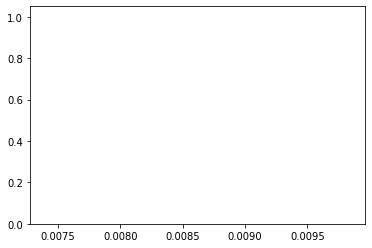

In [68]:
train_loss = tf.keras.losses.mae(reconstruction, normal_train_data)
plt.hist(train_loss, bins=5000)

In [41]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

TypeError: 'History' object is not subscriptable

In [59]:
# Testing anomaly on a different dataset

perturbed_train_data, normal_train_lb = allData_train_test_('CH', data = data, day = 1)




(3000,)


# V1.2 Autoencoder -